### Exploring data-reporting behaviour, clustering patterns, and further modelling based on six World Bank indicators (1960–2024)

This project explores six selected indicators from the World Bank database. The aim is to clean and preliminarily analyse the data before designing a modelling plan. In this initial phase, I examine data quality, completeness, and temporal coverage to identify which variables and periods are suitable for later modelling. The following analytical steps will be chosen based on the patterns observed after the cleaning process.

In [80]:
import pandas as pd
df = pd.read_csv("wbank_Data.csv")
print(df.columns)


Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2024 [YR2024]', '2023 [YR2023]', '2022 [YR2022]', '2021 [YR2021]',
       '2020 [YR2020]', '2019 [YR2019]', '2018 [YR2018]', '2017 [YR2017]',
       '2016 [YR2016]', '2015 [YR2015]', '2014 [YR2014]', '2013 [YR2013]',
       '2012 [YR2012]', '2011 [YR2011]', '2010 [YR2010]', '2009 [YR2009]',
       '2008 [YR2008]', '2007 [YR2007]', '2006 [YR2006]', '2005 [YR2005]',
       '2004 [YR2004]', '2003 [YR2003]', '2002 [YR2002]', '2001 [YR2001]',
       '2000 [YR2000]', '1999 [YR1999]', '1998 [YR1998]', '1997 [YR1997]',
       '1996 [YR1996]', '1995 [YR1995]', '1994 [YR1994]', '1993 [YR1993]',
       '1992 [YR1992]', '1991 [YR1991]', '1990 [YR1990]', '1989 [YR1989]',
       '1988 [YR1988]', '1987 [YR1987]', '1986 [YR1986]', '1985 [YR1985]',
       '1984 [YR1984]', '1983 [YR1983]', '1982 [YR1982]', '1981 [YR1981]',
       '1980 [YR1980]', '1979 [YR1979]', '1978 [YR1978]', '1977 [YR1977]',
       '1976 [YR1976]', '1975 [

Data structure is not ideal for analyzes, because years are in columns. Checking countries before handling the year-column problem with pycountry module:

In [81]:
import pycountry

# Load dataset
df = pd.read_csv("wbank_Data.csv")

# Try to resolve each Country Code to a country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return None

df["Resolved Name"] = df["Country Code"].apply(get_country_name)

# Show sample results
print(df[["Country Code", "Country Name", "Resolved Name"]].drop_duplicates().sort_values("Country Code").to_string())


     Country Code                                                               Country Name                           Resolved Name
54            ABW                                                                      Aruba                                   Aruba
1302          AFE                                                Africa Eastern and Southern                                    None
0             AFG                                                                Afghanistan                             Afghanistan
1308          AFW                                                 Africa Western and Central                                    None
30            AGO                                                                     Angola                                  Angola
6             ALB                                                                    Albania                                 Albania
24            AND                                                    

Remove non countries

In [82]:
import pandas as pd
import pycountry

# Load dataset
df = pd.read_csv("wbank_Data.csv")

# Get all valid ISO3 country codes
valid_iso3 = {c.alpha_3 for c in pycountry.countries}

# Keep only rows where Country Code is a valid ISO3 code
df = df[df["Country Code"].isin(valid_iso3)]

print(f"Kept {len(df)} rows with valid ISO3 country codes.")
print(f"Removed non-country codes (EUU, WLD, etc.).")


Kept 1290 rows with valid ISO3 country codes.
Removed non-country codes (EUU, WLD, etc.).


In [83]:

# Try to resolve each Country Code to a country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return None

df["Resolved Name"] = df["Country Code"].apply(get_country_name)

# Show sample results
print(df[["Country Code", "Country Name", "Resolved Name"]].drop_duplicates().sort_values("Country Code").to_string())


     Country Code                    Country Name                           Resolved Name
54            ABW                           Aruba                                   Aruba
0             AFG                     Afghanistan                             Afghanistan
30            AGO                          Angola                                  Angola
6             ALB                         Albania                                 Albania
24            AND                         Andorra                                 Andorra
1224          ARE            United Arab Emirates                    United Arab Emirates
42            ARG                       Argentina                               Argentina
48            ARM                         Armenia                                 Armenia
18            ASM                  American Samoa                          American Samoa
36            ATG             Antigua and Barbuda                     Antigua and Barbuda
60        

Checking results

In [84]:
import pandas as pd
import pycountry_convert as pc
import pycountry

# --- Working continent function ---
def get_continent(code):
    try:
        alpha2 = pc.country_alpha3_to_country_alpha2(code)
        cont_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(cont_code)
    except:
        return None

# --- Working country name function ---
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return None

# --- Load dataset ---
df = pd.read_csv("wbank_Data.csv")

# --- Get unique country codes ---
codes = sorted(df["Country Code"].dropna().unique().tolist())

# --- Build table of results ---
results = []
for code in codes:
    name = get_country_name(code)
    cont = get_continent(code)
    results.append((code, name, cont))

# --- Convert to DataFrame and show ---
df_results = pd.DataFrame(results, columns=["Country Code", "Country Name", "Continent"])
df_results = df_results.sort_values("Country Name")

print(df_results.to_string(index=False))


Country Code                           Country Name     Continent
         AFG                            Afghanistan          Asia
         ALB                                Albania        Europe
         DZA                                Algeria        Africa
         ASM                         American Samoa       Oceania
         AND                                Andorra        Europe
         AGO                                 Angola        Africa
         ATG                    Antigua and Barbuda North America
         ARG                              Argentina South America
         ARM                                Armenia          Asia
         ABW                                  Aruba North America
         AUS                              Australia       Oceania
         AUT                                Austria        Europe
         AZE                             Azerbaijan          Asia
         BHS                                Bahamas North America
         B

Still not good. "None" countries are present

In [85]:
# Resolve to real country names
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return None

df["Resolved Name"] = df["Country Code"].apply(get_country_name)

# Keep only rows where a real country was found
df = df[df["Resolved Name"].notna()]

print(f"Kept {len(df)} rows (real countries only).")
print(f"Removed non-country codes (regional or aggregate entries).")


Kept 1290 rows (real countries only).
Removed non-country codes (regional or aggregate entries).


In [86]:
print(df[["Country Code", "Country Name", "Resolved Name"]]
      .drop_duplicates()
      .sort_values("Country Code")
      .head(50)
      .to_string())

print(f"\nTotal unique Country Codes remaining: {df['Country Code'].nunique()}")


     Country Code              Country Name                          Resolved Name
54            ABW                     Aruba                                  Aruba
0             AFG               Afghanistan                            Afghanistan
30            AGO                    Angola                                 Angola
6             ALB                   Albania                                Albania
24            AND                   Andorra                                Andorra
1224          ARE      United Arab Emirates                   United Arab Emirates
42            ARG                 Argentina                              Argentina
48            ARM                   Armenia                                Armenia
18            ASM            American Samoa                         American Samoa
36            ATG       Antigua and Barbuda                    Antigua and Barbuda
60            AUS                 Australia                              Australia
66  

Results seems good for countries. Now create a year column and remove columns for individual years to reduce variables.

In [87]:
# --- Convert from wide to long format (years become rows instead of columns) ---
df = df.melt(
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code", "Resolved Name"],
    var_name="Year",
    value_name="Value"
)

# --- Clean the Year column (extract 4-digit year from text like '2024 [YR2024]') ---
df["Year"] = df["Year"].str.extract(r"(\d{4})").astype(float)

# --- Show result preview ---
print(df.head(20).to_string())
print(f"\nTotal rows after reshaping: {len(df)}")


      Country Name Country Code                                                          Series Name     Series Code   Resolved Name    Year             Value
0      Afghanistan          AFG                                 Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN     Afghanistan  2024.0                ..
1      Afghanistan          AFG                                                    Population, total     SP.POP.TOTL     Afghanistan  2024.0          42647492
2      Afghanistan          AFG                                   GDP per capita (constant 2015 US$)  NY.GDP.PCAP.KD     Afghanistan  2024.0                ..
3      Afghanistan          AFG  Unemployment, total (% of total labor force) (modeled ILO estimate)  SL.UEM.TOTL.ZS     Afghanistan  2024.0            13.295
4      Afghanistan          AFG                                                        Net migration     SM.POP.NETM     Afghanistan  2024.0            -44089
5      Afghanistan          AFG               

Not clear what happend. Check data structure.

In [88]:
# --- Show column structure and data types ---
print(df.info())

# --- Also show the column names in one line for clarity ---
print("\nColumns:")
print(list(df.columns))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83850 entries, 0 to 83849
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   83850 non-null  object 
 1   Country Code   83850 non-null  object 
 2   Series Name    83850 non-null  object 
 3   Series Code    83850 non-null  object 
 4   Resolved Name  83850 non-null  object 
 5   Year           83850 non-null  float64
 6   Value          83850 non-null  object 
dtypes: float64(1), object(6)
memory usage: 4.5+ MB
None

Columns:
['Country Name', 'Country Code', 'Series Name', 'Series Code', 'Resolved Name', 'Year', 'Value']


Variables are stored in Series Name, Series Code. Transform structure to have separate columns for each variable.

In [89]:
# --- Convert 'Series Name' values into separate columns ---
df_wide = df.pivot_table(
    index=["Country Name", "Country Code", "Resolved Name", "Year"],
    columns="Series Name",
    values="Value",
    aggfunc="first"
).reset_index()

# --- Flatten multi-level column index ---
df_wide.columns.name = None

# --- Show structure ---
print(df_wide.info())
print(df_wide.head(10).to_string())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13975 entries, 0 to 13974
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country Name                                                         13975 non-null  object 
 1   Country Code                                                         13975 non-null  object 
 2   Resolved Name                                                        13975 non-null  object 
 3   Year                                                                 13975 non-null  float64
 4   Average precipitation in depth (mm per year)                         13975 non-null  object 
 5   Birth rate, crude (per 1,000 people)                                 13975 non-null  object 
 6   GDP per capita (constant 2015 US$)                                   13975 non-null  object 
 7   Net 

Clean data further with removing ".." (missing data") and create numberic values.

In [90]:
# --- Convert numeric columns from strings to real numbers (replace '..' with NaN) ---
df_wide = df_wide.replace("..", pd.NA)

# Try to convert all columns except the identifiers
cols_to_num = df_wide.columns.difference(["Country Name", "Country Code", "Resolved Name", "Year"])
df_wide[cols_to_num] = df_wide[cols_to_num].apply(pd.to_numeric, errors="coerce")

# --- Check structure again ---
print(df_wide.info())
print(df_wide.head(5).to_string())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13975 entries, 0 to 13974
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country Name                                                         13975 non-null  object 
 1   Country Code                                                         13975 non-null  object 
 2   Resolved Name                                                        13975 non-null  object 
 3   Year                                                                 13975 non-null  float64
 4   Average precipitation in depth (mm per year)                         10448 non-null  float64
 5   Birth rate, crude (per 1,000 people)                                 13730 non-null  float64
 6   GDP per capita (constant 2015 US$)                                   11235 non-null  float64
 7   Net 

Now checking one line to see the structure

In [91]:
# --- Select one example row (e.g. Afghanistan, 1960) ---
row = df_wide[(df_wide["Country Name"] == "Afghanistan") & (df_wide["Year"] == 1960)].iloc[0]

# --- Print each variable on a separate line ---
for col, val in row.items():
    print(f"{col:70} : {val}")


Country Name                                                           : Afghanistan
Country Code                                                           : AFG
Resolved Name                                                          : Afghanistan
Year                                                                   : 1960.0
Average precipitation in depth (mm per year)                           : nan
Birth rate, crude (per 1,000 people)                                   : 50.516
GDP per capita (constant 2015 US$)                                     : nan
Net migration                                                          : 2606
Population, total                                                      : 9035043.0
Unemployment, total (% of total labor force) (modeled ILO estimate)    : nan


Create a datacut as backup from the cleaned data as csv


In [92]:
# --- Export the cleaned and reshaped dataset ---
df_wide.to_csv("wbank_clean_longwide.csv", index=False)
print("Saved backup file: wbank_clean_longwide.csv")


Saved backup file: wbank_clean_longwide.csv


Let's have a quick review of the 6 variables - chaning in time.

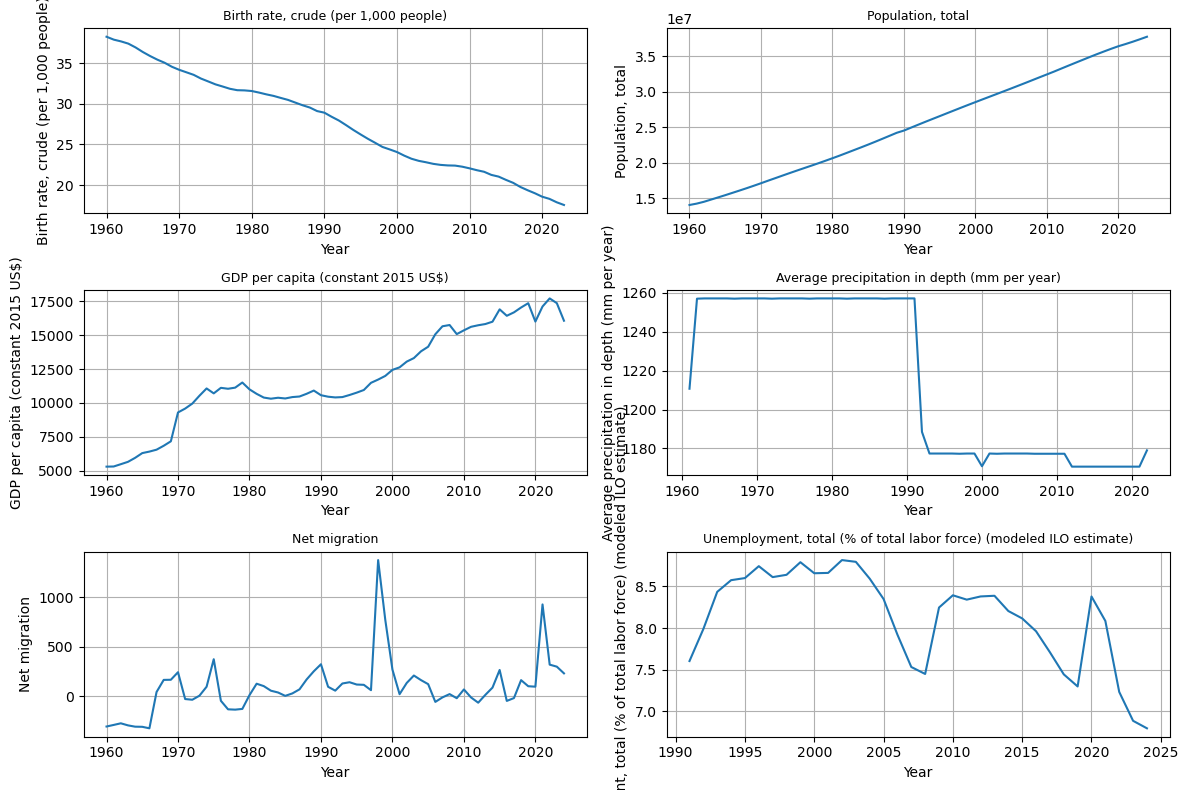

In [93]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 100

variables = [
    "Birth rate, crude (per 1,000 people)",
    "Population, total",
    "GDP per capita (constant 2015 US$)",
    "Average precipitation in depth (mm per year)",
    "Net migration",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)"
]

df_wide["Year"] = pd.to_numeric(df_wide["Year"], errors="coerce")

# --- Create grid of 2 columns x 3 rows ---
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

# --- Plot each variable in its subplot ---
for i, var in enumerate(variables):
    df_plot = df_wide.groupby("Year")[var].mean().sort_index()
    axes[i].plot(df_plot.index, df_plot.values)
    axes[i].set_title(var, fontsize=9)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel(var)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Recognitions:

1, Birth rate is declining, but population is still growing - looking linear. If birth rate would still grow, the population growth would be exponential. 

2, Avarage percipitation variable is not reliable and won't be analized. Back ground information: the same avarage value is fit for most of the countries for each year. This is a data source issue.

Creating another save of the data, cleaned from non-country entries. 

In [94]:
df_wide.to_csv("wbank_clean_countries.csv", index=False)
print("Saved: wbank_clean_countries.csv")

Saved: wbank_clean_countries.csv


The data is collected by Word Bank from various sources. Countries are not always reporting data. Let's check the the number of countries for each year that reported data.

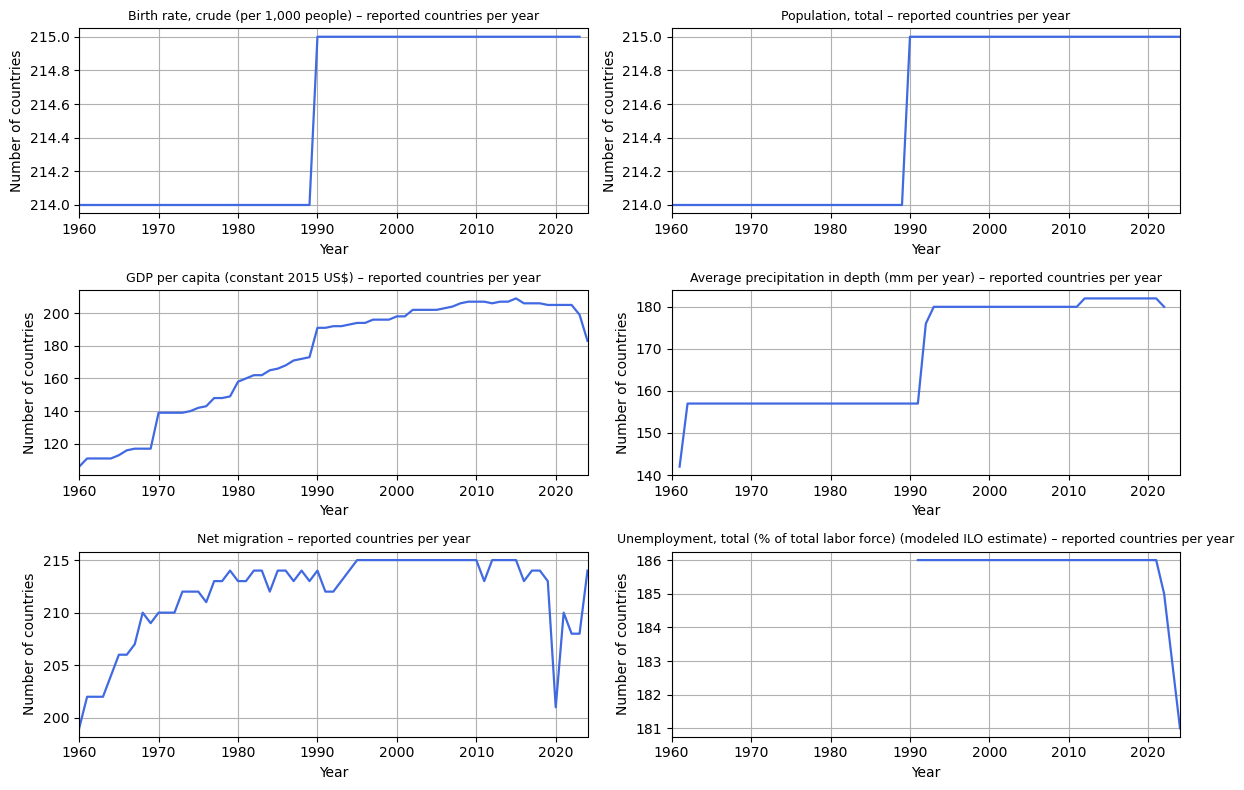

In [95]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 100

variables = [
    "Birth rate, crude (per 1,000 people)",
    "Population, total",
    "GDP per capita (constant 2015 US$)",
    "Average precipitation in depth (mm per year)",
    "Net migration",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)"
]

# --- Year to numeric ---
df_wide["Year"] = pd.to_numeric(df_wide["Year"], errors="coerce")

# --- 3x2 plot grid ---
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

# --- Count valid entries per year for each variable ---
for i, var in enumerate(variables):
    df_var = df_wide[df_wide[var].notna() & (df_wide[var] != 0)]
    counts = df_var.groupby("Year")[var].count()

    axes[i].plot(counts.index, counts.values, color="royalblue", linewidth=1.6)
    axes[i].set_xlim(1960, 2024)
    axes[i].set_title(f"{var} – reported countries per year", fontsize=9)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of countries")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


- Birth rate and population data are reported for each year since 1990.
- The reporting willingness for GDP per capita shows initial instability but demonstrates a steady long-term increase.
- Net migration remained stable after 1990 but collapsed in 2020.
- The reporting of unemployment rates has been stable since 1990, but after 2021 the reporting frequency became irregular.

Based on the cleaned dataset, I start by analysing data-reporting trends to identify typical reporting behaviours and clusters among countries. These clusters will then be examined and characterised in more detail. Next, I will explore relationships between the main variables, and finally design a regression model that best fits the nature of the data to forecast future values and behavioural patterns at the cluster or country level. The exact analytical methods will be selected according to the insights gained during the exploratory phase.

### Analyzes phase II

Checking Congo's data reporting behaviour on GDP per capita.

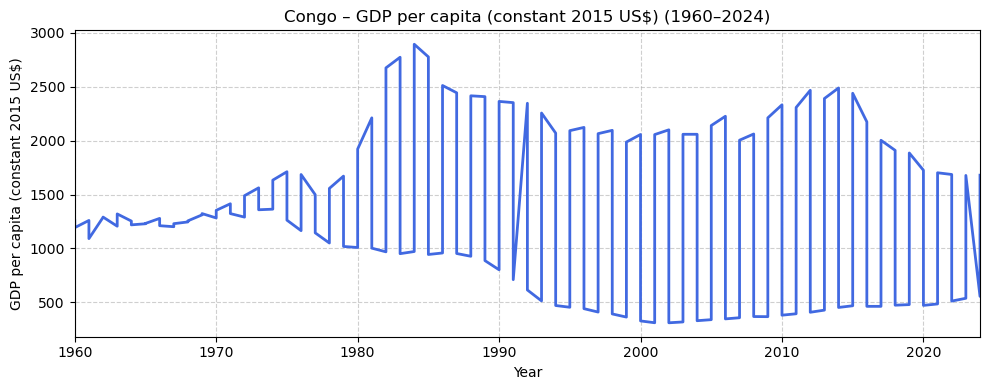

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

country = "Congo"
variable = "GDP per capita (constant 2015 US$)"

df_hu = df_wide[df_wide["Country Name"].str.contains(country, case=False, na=False)]

if df_hu.empty:
    print("No data found for Congo.")
else:
    df_hu = df_hu.copy()
    df_hu["Year"] = pd.to_numeric(df_hu["Year"], errors="coerce")
    df_hu[variable] = pd.to_numeric(df_hu[variable].replace(["..", ""], np.nan), errors="coerce")
    df_hu = df_hu.dropna(subset=[variable]).sort_values("Year")

    plt.figure(figsize=(10, 4))
    plt.plot(df_hu["Year"], df_hu[variable], color="royalblue", linewidth=2)
    plt.title(f"{country} – {variable} (1960–2024)")
    plt.xlabel("Year")
    plt.ylabel("GDP per capita (constant 2015 US$)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xlim(1960, 2024)
    plt.tight_layout()
    plt.show()


Checking Hungary's data reporting behaviour on GDP per capita.

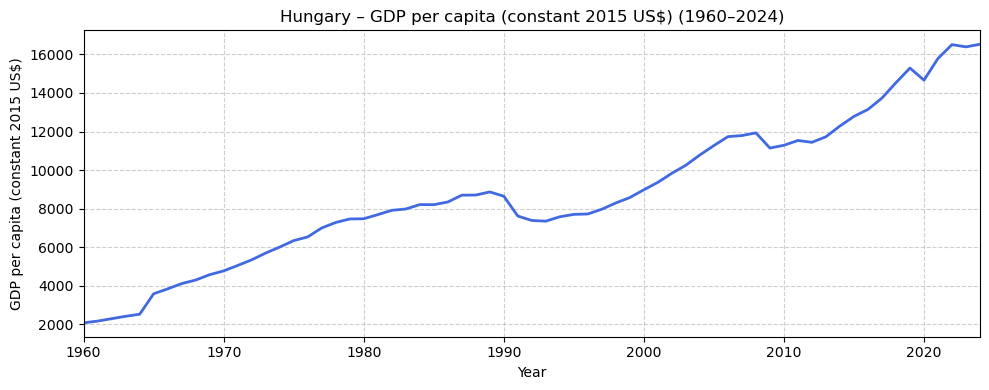

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

country = "Hungary"
variable = "GDP per capita (constant 2015 US$)"

df_hu = df_wide[df_wide["Country Name"].str.contains(country, case=False, na=False)]

if df_hu.empty:
    print("No data found for Hungary.")
else:
    df_hu = df_hu.copy()
    df_hu["Year"] = pd.to_numeric(df_hu["Year"], errors="coerce")
    df_hu[variable] = pd.to_numeric(df_hu[variable].replace(["..", ""], np.nan), errors="coerce")
    df_hu = df_hu.dropna(subset=[variable]).sort_values("Year")

    plt.figure(figsize=(10, 4))
    plt.plot(df_hu["Year"], df_hu[variable], color="royalblue", linewidth=2)
    plt.title(f"{country} – {variable} (1960–2024)")
    plt.xlabel("Year")
    plt.ylabel("GDP per capita (constant 2015 US$)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xlim(1960, 2024)
    plt.tight_layout()
    plt.show()


Checking Korea, Dem. People's Rep.'s data reporting behaviour on GDP per capita.

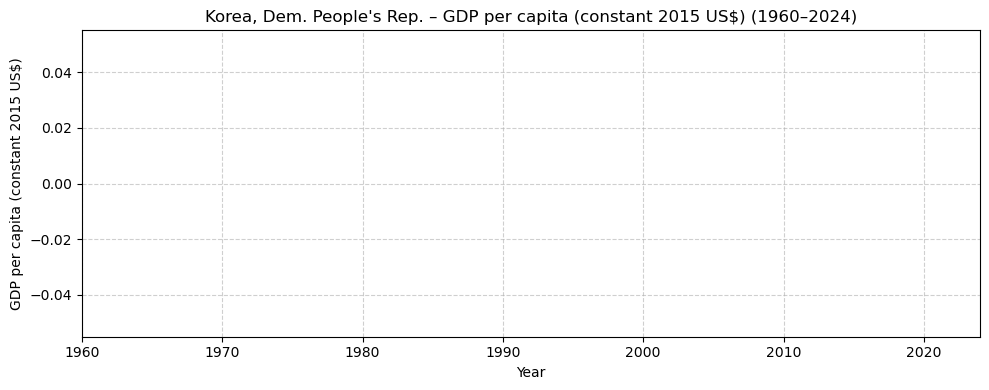

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

country = "Korea, Dem. People's Rep."
variable = "GDP per capita (constant 2015 US$)"

df_hu = df_wide[df_wide["Country Name"].str.contains(country, case=False, na=False)]

if df_hu.empty:
    print("No data found for Korea, Dem. People's Rep..")
else:
    df_hu = df_hu.copy()
    df_hu["Year"] = pd.to_numeric(df_hu["Year"], errors="coerce")
    df_hu[variable] = pd.to_numeric(df_hu[variable].replace(["..", ""], np.nan), errors="coerce")
    df_hu = df_hu.dropna(subset=[variable]).sort_values("Year")

    plt.figure(figsize=(10, 4))
    plt.plot(df_hu["Year"], df_hu[variable], color="royalblue", linewidth=2)
    plt.title(f"{country} – {variable} (1960–2024)")
    plt.xlabel("Year")
    plt.ylabel("GDP per capita (constant 2015 US$)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xlim(1960, 2024)
    plt.tight_layout()
    plt.show()


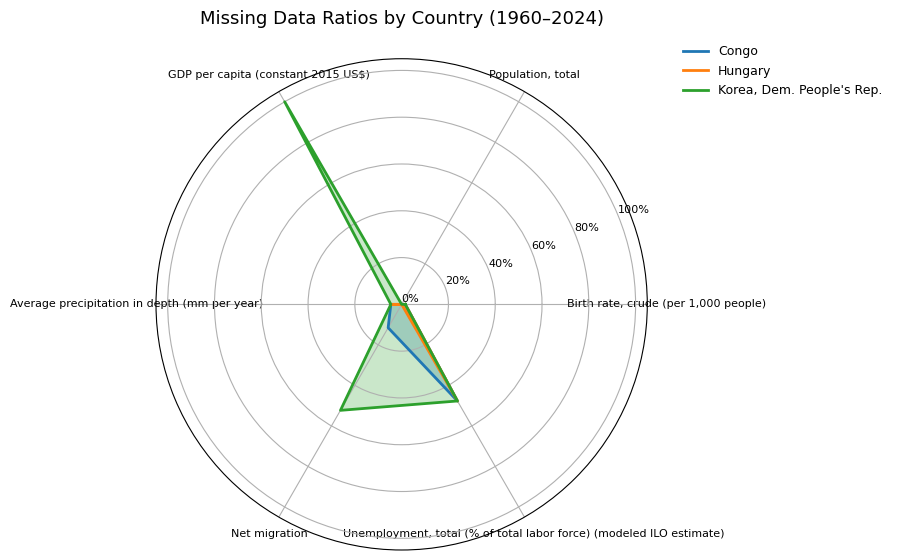

In [99]:
import numpy as np
import matplotlib.pyplot as plt

countries = ["Congo", "Hungary", "Korea, Dem. People's Rep."]
variables = [
    "Birth rate, crude (per 1,000 people)",
    "Population, total",
    "GDP per capita (constant 2015 US$)",
    "Average precipitation in depth (mm per year)",
    "Net migration",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)"
]

missing_ratios = {}
for country in countries:
    df_country = df_wide[df_wide["Country Name"].str.contains(country, case=False, na=False)]
    ratios = []
    for var in variables:
        series = df_country[var].replace("..", np.nan)
        series = pd.to_numeric(series, errors="coerce")
        missing_ratio = np.mean(series.isna() | (series == 0))
        ratios.append(missing_ratio)
    missing_ratios[country] = ratios

angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(polar=True))  # nagyobb ábra

for country, ratios in missing_ratios.items():
    values = ratios + ratios[:1]
    ax.plot(angles, values, linewidth=2, label=country)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables, fontsize=8)
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels([f"{int(x*100)}%" for x in np.linspace(0, 1, 6)], fontsize=8)
ax.set_title("Missing Data Ratios by Country (1960–2024)", fontsize=13, pad=25)

# Jelmagyarázat a szabad helyre
ax.legend(
    loc="upper left",
    bbox_to_anchor=(1.05, 1.05), 
    fontsize=9,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # kicsit lejjebb tolja a grafikont
plt.show()


We will now perform clustering using the K-means algorithm, based on six-dimensional vectors constructed for each country from the variables shown above. 


The K-means algorithm will be initialized with the following parameters:

* **n_clusters = 3** – the number of clusters (*K*), which will later be varied to find the optimal value.
* **init = "k-means++"** – intelligent centroid initialization to improve convergence and reduce random bias.
* **n_init = 20** – the algorithm will run 20 times with different centroid seeds to ensure stable results.
* **max_iter = 300** – maximum number of iterations allowed per run.
* **random_state = 42** – fixed random seed for reproducibility.
* **tol = 1e-4** – tolerance threshold for convergence stopping.


In [100]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

variables = [
    "Birth rate, crude (per 1,000 people)",
    "Population, total",
    "GDP per capita (constant 2015 US$)",
    "Average precipitation in depth (mm per year)",
    "Net migration",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)"
]

# --- Compute missing-data ratios per country ---
country_ratios = []
for country in df_wide["Country Name"].unique():
    df_country = df_wide[df_wide["Country Name"] == country]
    ratios = []
    for var in variables:
        series = df_country[var].replace("..", np.nan)
        series = pd.to_numeric(series, errors="coerce")
        missing_ratio = np.mean(series.isna() | (series == 0))
        ratios.append(missing_ratio)
    country_ratios.append([country] + ratios)

df_missing = pd.DataFrame(country_ratios, columns=["Country"] + variables)
df_missing = df_missing.dropna().reset_index(drop=True)

# --- Prepare data and run K-means ---
X = df_missing[variables].values
kmeans = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=20,
    max_iter=300,
    random_state=42,
    tol=1e-4
)
df_missing["Cluster"] = kmeans.fit_predict(X)

# --- Summary output ---
cluster_counts = df_missing["Cluster"].value_counts().sort_index()

print(f"Number of clusters: {kmeans.n_clusters}\n")
print("Cluster sizes:")
for cluster_id, size in cluster_counts.items():
    print(f"  Cluster {cluster_id}: {size} countries")

print("\nSample of clustered countries:")
print(df_missing[["Country", "Cluster"]].head(15))


Number of clusters: 3

Cluster sizes:
  Cluster 0: 149 countries
  Cluster 1: 31 countries
  Cluster 2: 35 countries

Sample of clustered countries:
                Country  Cluster
0           Afghanistan        1
1               Albania        0
2               Algeria        0
3        American Samoa        2
4               Andorra        2
5                Angola        0
6   Antigua and Barbuda        0
7             Argentina        0
8               Armenia        1
9                 Aruba        2
10            Australia        0
11              Austria        0
12           Azerbaijan        1
13         Bahamas, The        0
14              Bahrain        0


D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [101]:
from sklearn.metrics import silhouette_score

# --- After KMeans fitting ---
inertia = kmeans.inertia_
silhouette = silhouette_score(X, df_missing["Cluster"])

print(f"\nClustering quality metrics:")
print(f"  Sum of Squared Errors (SSE): {inertia:.2f}")
print(f"  Silhouette score: {silhouette:.3f}")



Clustering quality metrics:
  Sum of Squared Errors (SSE): 12.60
  Silhouette score: 0.652


Let's overview the clusters

In [102]:
# --- klaszterek középértékei ---
cluster_means = df_missing.groupby("Cluster")[variables].mean()
cluster_sizes = df_missing["Cluster"].value_counts().sort_index()

print("=== Cluster Overview ===")
for c in sorted(df_missing["Cluster"].unique()):
    size = cluster_sizes[c]
    means = cluster_means.loc[c]
    avg_missing = means.mean()
    
    # rövid automatikus értelmezés
    if avg_missing < 0.1:
        desc = "High reporting discipline – most indicators consistently reported."
    elif avg_missing < 0.4:
        desc = "Moderate reporting – some indicators occasionally missing."
    elif avg_missing < 0.7:
        desc = "Irregular reporting – many missing data points across years."
    else:
        desc = "Very poor reporting – data largely unavailable."
    
    print(f"\nCluster {c}")
    print(f"  Number of countries: {size}")
    print(f"  Mean missing ratios:")
    print(means.round(2).to_string())
    print(f"  → Interpretation: {desc}")
    
    # példák az országokra
    examples = df_missing[df_missing["Cluster"] == c]["Country"].head(5).to_list()
    print(f"  Example countries: {', '.join(examples)}")


=== Cluster Overview ===

Cluster 0
  Number of countries: 149
  Mean missing ratios:
Birth rate, crude (per 1,000 people)                                   0.02
Population, total                                                      0.00
GDP per capita (constant 2015 US$)                                     0.06
Average precipitation in depth (mm per year)                           0.05
Net migration                                                          0.01
Unemployment, total (% of total labor force) (modeled ILO estimate)    0.49
  → Interpretation: Moderate reporting – some indicators occasionally missing.
  Example countries: Albania, Algeria, Angola, Antigua and Barbuda, Argentina

Cluster 1
  Number of countries: 31
  Mean missing ratios:
Birth rate, crude (per 1,000 people)                                   0.03
Population, total                                                      0.01
GDP per capita (constant 2015 US$)                                     0.52
Average preci

This clustering is not informative. Let's try with different K-s, let's find the optimal K, with Elbow + Silhouette method.

D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=2: total clustering error=18.48, separation=0.682
K=3: total clustering error=12.60, separation=0.652
K=4: total clustering error=9.46, separation=0.647


D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=5: total clustering error=6.98, separation=0.675


D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=6: total clustering error=5.72, separation=0.696
K=7: total clustering error=4.46, separation=0.725
K=8: total clustering error=3.49, separation=0.730


D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=9: total clustering error=2.64, separation=0.746


D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=10: total clustering error=2.25, separation=0.740


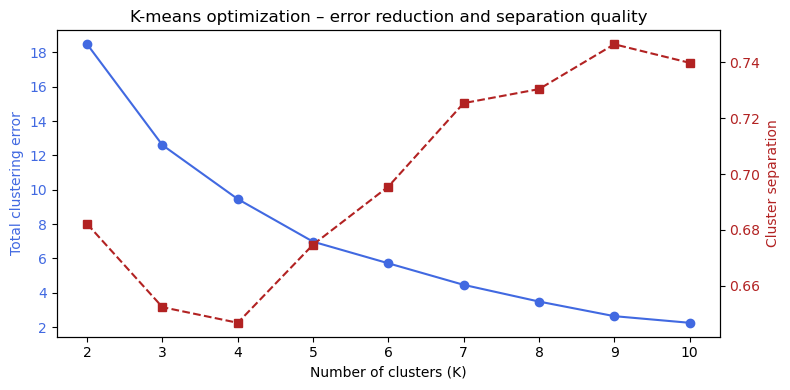

In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X = df_missing[variables].values

Ks = range(2, 11)
inertias = []
separations = []

for k in Ks:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=20,
        max_iter=300,
        random_state=42,
        tol=1e-4
    )
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    sep_score = silhouette_score(X, labels)
    separations.append(sep_score)
    print(f"K={k}: total clustering error={kmeans.inertia_:.2f}, separation={sep_score:.3f}")

# --- Visualize clustering error and separation ---
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(Ks, inertias, "o-", color="royalblue", label="Total clustering error")
ax1.set_xlabel("Number of clusters (K)")
ax1.set_ylabel("Total clustering error", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")
ax1.set_title("K-means optimization – error reduction and separation quality")

ax2 = ax1.twinx()
ax2.plot(Ks, separations, "s--", color="firebrick", label="Cluster separation")
ax2.set_ylabel("Cluster separation", color="firebrick")
ax2.tick_params(axis="y", labelcolor="firebrick")

fig.tight_layout()
plt.show()


We tested different numbers of clusters (K = 2–10) and examined how the total clustering error decreased and how clearly the clusters separated as K increased.
The results suggest that the error reduction slows down around K = 5–6, while the separation between clusters is best around K = 9.
Therefore, both K = 6 and K = 9 seem to describe meaningful reporting-behavior patterns at different levels of detail.

In [104]:
# --- K-means clustering setup ---
from sklearn.cluster import KMeans

K = 6  

X = df_missing[variables].values
kmeans = KMeans(
    n_clusters=K,
    init="k-means++",
    n_init=20,
    max_iter=300,
    random_state=42,
    tol=1e-4
)
df_missing["Cluster"] = kmeans.fit_predict(X)

print(f"Total clusters (K): {K}")

# --- klaszterek középértékei ---
cluster_means = df_missing.groupby("Cluster")[variables].mean()
cluster_sizes = df_missing["Cluster"].value_counts().sort_index()

# --- országoszlop azonosítása ---
country_col = None
for name_option in ["Country", "Country Name", "Resolved Name"]:
    if name_option in df_missing.columns:
        country_col = name_option
        break

print("\n=== Cluster Overview ===")
for c in sorted(df_missing["Cluster"].unique()):
    size = cluster_sizes[c]
    means = cluster_means.loc[c]
    avg_missing = means.mean()

    # rövid automatikus értelmezés
    if avg_missing < 0.1:
        desc = "High reporting discipline – most indicators consistently reported."
    elif avg_missing < 0.4:
        desc = "Moderate reporting – some indicators occasionally missing."
    elif avg_missing < 0.7:
        desc = "Irregular reporting – many missing data points across years."
    else:
        desc = "Very poor reporting – data largely unavailable."

    print(f"\nCluster {c}")
    print(f"  Number of countries: {size}")
    print(f"  Mean missing ratios:")
    print(means.round(2).to_string())
    print(f"  → Interpretation: {desc}")

    # példák az országokra
    if country_col:
        examples = df_missing[df_missing["Cluster"] == c][country_col].head(5).to_list()
        print(f"  Example countries: {', '.join(examples)}")


Total clusters (K): 6

=== Cluster Overview ===

Cluster 0
  Number of countries: 124
  Mean missing ratios:
Birth rate, crude (per 1,000 people)                                   0.02
Population, total                                                      0.00
GDP per capita (constant 2015 US$)                                     0.02
Average precipitation in depth (mm per year)                           0.05
Net migration                                                          0.01
Unemployment, total (% of total labor force) (modeled ILO estimate)    0.48
  → Interpretation: High reporting discipline – most indicators consistently reported.
  Example countries: Algeria, Argentina, Australia, Austria, Bahamas, The

Cluster 1
  Number of countries: 8
  Mean missing ratios:
Birth rate, crude (per 1,000 people)                                   0.02
Population, total                                                      0.00
GDP per capita (constant 2015 US$)                             

D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Let's plot the cluster properties.

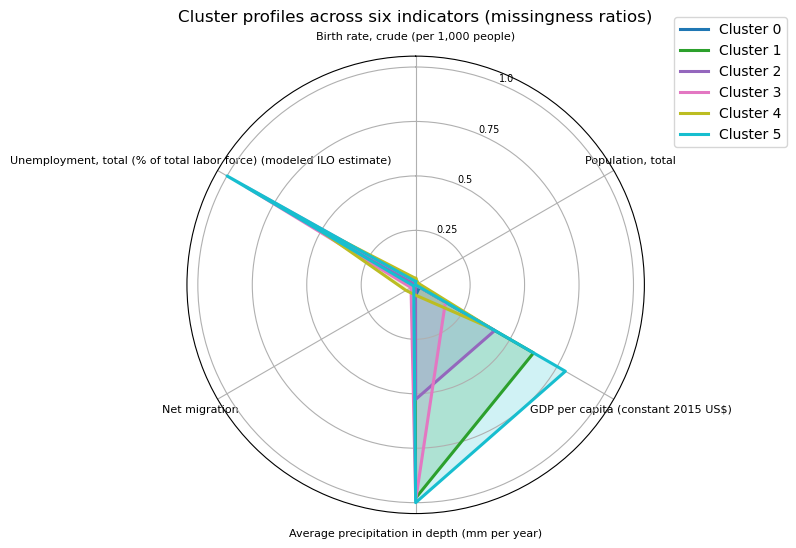

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# --- radar chart előkészítése ---
labels = variables
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # bezárjuk a kört

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = plt.cm.tab10(np.linspace(0, 1, len(cluster_means)))  # jól megkülönböztethető színek

for c, color in zip(sorted(cluster_means.index), colors):
    values = cluster_means.loc[c].tolist() + [cluster_means.loc[c].iloc[0]]
    ax.plot(angles, values, label=f"Cluster {c}", linewidth=2.2, color=color)
    ax.fill(angles, values, color=color, alpha=0.2)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=8)
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(["0.25", "0.5", "0.75", "1.0"], fontsize=7)
ax.set_title("Cluster profiles across six indicators (missingness ratios)", pad=25)
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1.1))
plt.tight_layout()
plt.show()


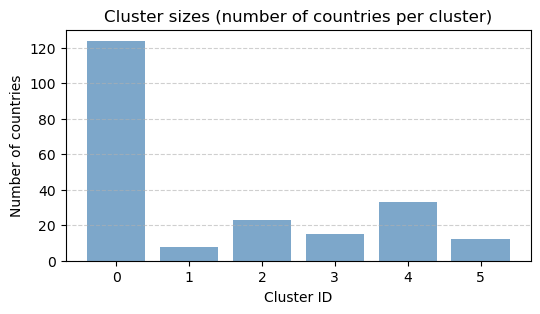

In [106]:
plt.figure(figsize=(6, 3))
plt.bar(cluster_sizes.index, cluster_sizes.values, color="steelblue", alpha=0.7)
plt.xlabel("Cluster ID")
plt.ylabel("Number of countries")
plt.title("Cluster sizes (number of countries per cluster)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


### Using clustering (K-means) on six indicators from 1960 to 2024 for 215 countries, we identified six distinct groups based on their data-reporting gaps. The clusters differ clearly in both size and reporting behavior, turning a dataset that was not easily interpretable into a mathematically structured and meaningful representation of reporting discipline over time.



Let's try with K = 12

In [107]:
# --- K-means clustering setup ---
from sklearn.cluster import KMeans

K = 12 

X = df_missing[variables].values
kmeans = KMeans(
    n_clusters=K,
    init="k-means++",
    n_init=20,
    max_iter=300,
    random_state=42,
    tol=1e-4
)
df_missing["Cluster"] = kmeans.fit_predict(X)

print(f"Total clusters (K): {K}")

# --- klaszterek középértékei ---
cluster_means = df_missing.groupby("Cluster")[variables].mean()
cluster_sizes = df_missing["Cluster"].value_counts().sort_index()

# --- országoszlop azonosítása ---
country_col = None
for name_option in ["Country", "Country Name", "Resolved Name"]:
    if name_option in df_missing.columns:
        country_col = name_option
        break

print("\n=== Cluster Overview ===")
for c in sorted(df_missing["Cluster"].unique()):
    size = cluster_sizes[c]
    means = cluster_means.loc[c]
    avg_missing = means.mean()

    # rövid automatikus értelmezés
    if avg_missing < 0.1:
        desc = "High reporting discipline – most indicators consistently reported."
    elif avg_missing < 0.4:
        desc = "Moderate reporting – some indicators occasionally missing."
    elif avg_missing < 0.7:
        desc = "Irregular reporting – many missing data points across years."
    else:
        desc = "Very poor reporting – data largely unavailable."

    print(f"\nCluster {c}")
    print(f"  Number of countries: {size}")
    print(f"  Mean missing ratios:")
    print(means.round(2).to_string())
    print(f"  → Interpretation: {desc}")

    # példák az országokra
    if country_col:
        examples = df_missing[df_missing["Cluster"] == c][country_col].head(5).to_list()
        print(f"  Example countries: {', '.join(examples)}")


Total clusters (K): 12

=== Cluster Overview ===

Cluster 0
  Number of countries: 21
  Mean missing ratios:
Birth rate, crude (per 1,000 people)                                   0.02
Population, total                                                      0.00
GDP per capita (constant 2015 US$)                                     0.46
Average precipitation in depth (mm per year)                           0.53
Net migration                                                          0.00
Unemployment, total (% of total labor force) (modeled ILO estimate)    0.48
  → Interpretation: Moderate reporting – some indicators occasionally missing.
  Example countries: Armenia, Azerbaijan, Belarus, Bosnia and Herzegovina, Croatia

Cluster 1
  Number of countries: 110
  Mean missing ratios:
Birth rate, crude (per 1,000 people)                                   0.02
Population, total                                                      0.00
GDP per capita (constant 2015 US$)                          

D:\Anakonda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


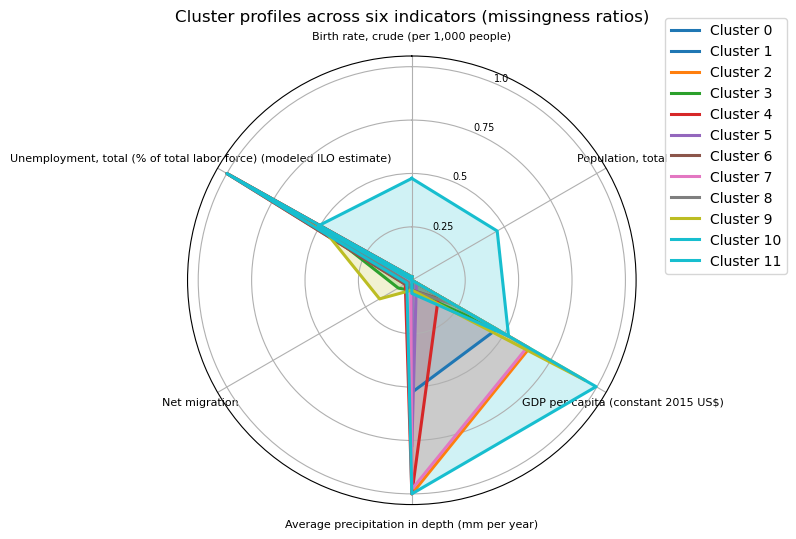

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# --- radar chart előkészítése ---
labels = variables
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # bezárjuk a kört

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = plt.cm.tab10(np.linspace(0, 1, len(cluster_means)))  # jól megkülönböztethető színek

for c, color in zip(sorted(cluster_means.index), colors):
    values = cluster_means.loc[c].tolist() + [cluster_means.loc[c].iloc[0]]
    ax.plot(angles, values, label=f"Cluster {c}", linewidth=2.2, color=color)
    ax.fill(angles, values, color=color, alpha=0.2)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=8)
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(["0.25", "0.5", "0.75", "1.0"], fontsize=7)
ax.set_title("Cluster profiles across six indicators (missingness ratios)", pad=25)
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1.1))
plt.tight_layout()
plt.show()


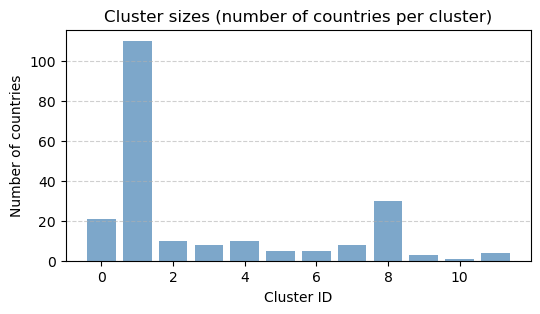

In [109]:
plt.figure(figsize=(6, 3))
plt.bar(cluster_sizes.index, cluster_sizes.values, color="steelblue", alpha=0.7)
plt.xlabel("Cluster ID")
plt.ylabel("Number of countries")
plt.title("Cluster sizes (number of countries per cluster)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### With K = 12, the clustering remains mathematically stable and well-separated. Centroids show distinct missing-data profiles, within-cluster variance is low, and no random fragmentation appears. The model provides a consistent, high-resolution partition of the six-dimensional feature space. Compared to lower K values, increasing the number of clusters revealed finer structural differences that were previously merged in broader groups. Variables with low overall variance, such as birth rate, population, and migration reporting gaps, became distinguishable only at higher K, reflecting a higher-resolution segmentation of subtle reporting behaviors.


### Part II

In Part II we will do cluster analyzes for GDP and population groth. For this first we prepare the data. 
Let's check the data missing is distributated across countries and years. The darker the dot, the more data is present (5 variables).

Variables used: ['Birth rate, crude (per 1,000 people)', 'Population, total', 'GDP per capita (constant 2015 US$)', 'Net migration', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']


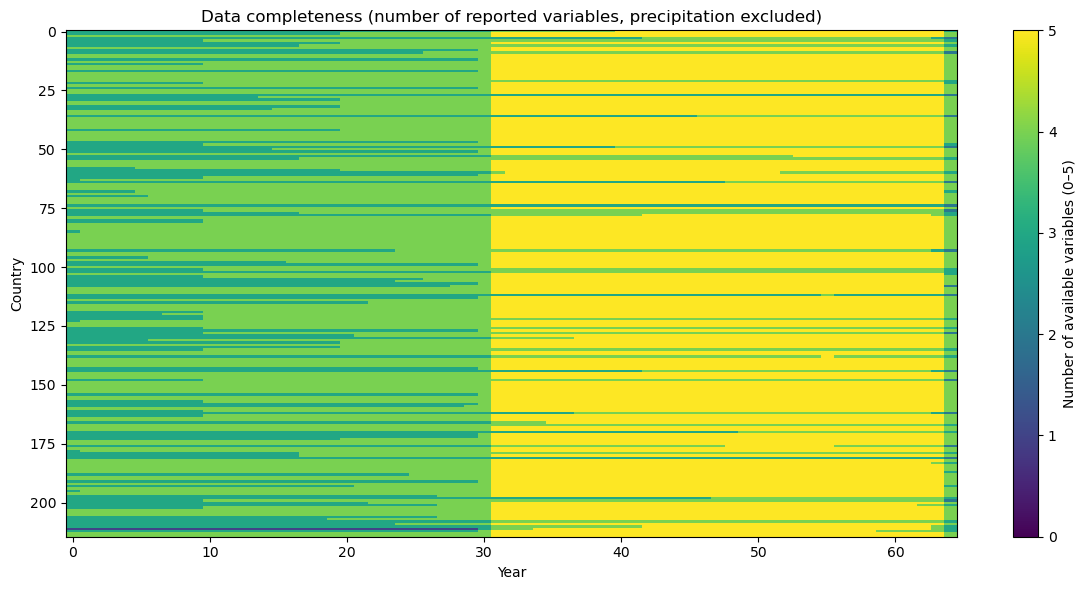

In [114]:
import numpy as np
import matplotlib.pyplot as plt

country_col = "Country Name"

# --- select variables excluding precipitation ---
vars5 = [v for v in variables if "precip" not in v.lower()]
print("Variables used:", vars5)

# --- build country–year table with completeness as an INTEGER (0–5) ---
df_plot = df_wide[[country_col, "Year"] + vars5].copy()
df_plot["completeness"] = df_plot[vars5].notna().sum(axis=1)

pivot = df_plot.pivot_table(
    index=country_col,
    columns="Year",
    values="completeness",
    aggfunc="mean"
).sort_index(axis=1)

Z = pivot.values  # 0..5

plt.figure(figsize=(12, 6))
im = plt.imshow(
    Z,
    aspect="auto",
    interpolation="nearest",
    vmin=0,
    vmax=len(vars5)
)

cbar = plt.colorbar(im)
cbar.set_label("Number of available variables (0–5)")
cbar.set_ticks(range(0, len(vars5) + 1))

plt.xlabel("Year")
plt.ylabel("Country")
plt.title("Data completeness (number of reported variables, precipitation excluded)")
plt.tight_layout()
plt.show()


The above plot shows, that there are periods when some countires haven't sent data, no dots are visible. We want to filter out years and countries where data missing ratio is too high for our analyzes. We will focos on the yellow part of the plot (all 5 variables are present) and also remove countires that have less then 80% full data in this period. In the previous part we understood that unenployement variable was the latest that was introduced to countries - this is the latest that was started to be reported, and unenployement also has a decrees around 2022. Let's focus on unenployement to define the right focus period.

Using variable: Unemployment, total (% of total labor force) (modeled ILO estimate)
Detected full unemployment reporting period: 1991.0–2023.0


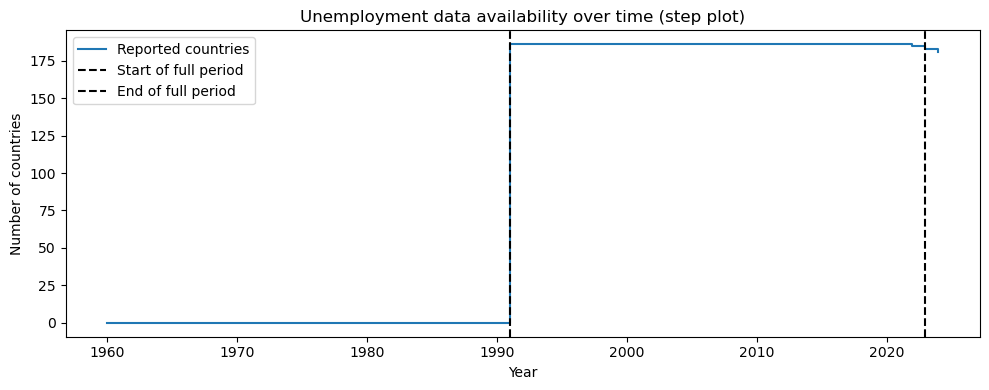

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# --- unemployment variable ---
unemp_var = [v for v in variables if "unemployment" in v.lower()][0]
print("Using variable:", unemp_var)

# --- count reporting countries per year ---
unemp_counts = (
    df_wide.groupby("Year")[unemp_var]
    .apply(lambda x: x.notna().sum())
    .sort_index()
)

years = unemp_counts.index.to_numpy()
counts = unemp_counts.values

# --- define "full reporting" threshold ---
threshold = 0.98 * counts.max()

# --- find first and last year above threshold (NO interpolation) ---
full_years = years[counts >= threshold]

UNEMP_REGIME_START = full_years.min()
UNEMP_REGIME_END = full_years.max()

print(f"Detected full unemployment reporting period: {UNEMP_REGIME_START}–{UNEMP_REGIME_END}")

# --- STEP PLOT (no visual bending) ---
plt.figure(figsize=(10, 4))

plt.step(years, counts, where="post", label="Reported countries")

plt.axvline(
    UNEMP_REGIME_START, linestyle="--", color="black",
    label="Start of full period"
)
plt.axvline(
    UNEMP_REGIME_END, linestyle="--", color="black",
    label="End of full period"
)

plt.xlabel("Year")
plt.ylabel("Number of countries")
plt.title("Unemployment data availability over time (step plot)")
plt.legend()
plt.tight_layout()
plt.show()


The start of the analized period will be 1991, and the end won't be fixed, as data sending and not sending behaviour is also a factor for a cluster analyzes. 

Variables used: ['Birth rate, crude (per 1,000 people)', 'Population, total', 'GDP per capita (constant 2015 US$)', 'Net migration', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']


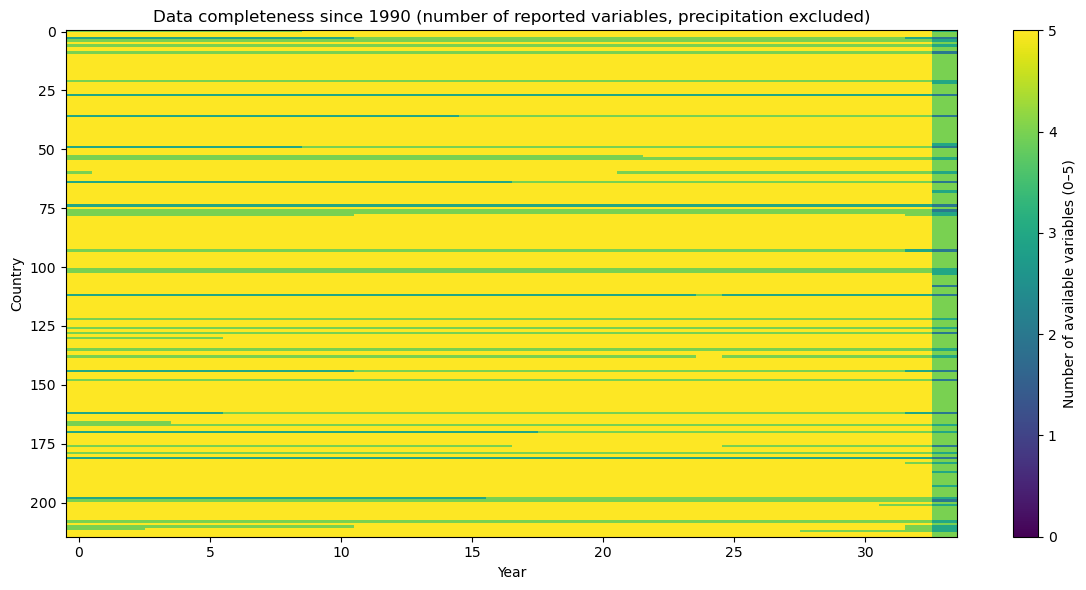

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# --- select variables excluding precipitation ---
vars5 = [v for v in variables if "precip" not in v.lower()]
print("Variables used:", vars5)

# --- restrict to years >= 1990 ---
df_plot = df_wide[df_wide["Year"] >= 1991][[country_col, "Year"] + vars5].copy()

# --- build country–year table with completeness as an INTEGER (0–5) ---
df_plot["completeness"] = df_plot[vars5].notna().sum(axis=1)

pivot = df_plot.pivot_table(
    index=country_col,
    columns="Year",
    values="completeness",
    aggfunc="mean"
).sort_index(axis=1)

# --- visualization: discrete integer scale ---
Z = pivot.values  # values are 0..5

plt.figure(figsize=(12, 6))
im = plt.imshow(
    Z,
    aspect="auto",
    interpolation="nearest",
    vmin=0,
    vmax=len(vars5)
)

cbar = plt.colorbar(im)
cbar.set_label("Number of available variables (0–5)")
cbar.set_ticks(range(0, len(vars5) + 1))

plt.xlabel("Year")
plt.ylabel("Country")
plt.title("Data completeness since 1990 (number of reported variables, precipitation excluded)")
plt.tight_layout()
plt.show()


In [117]:
import numpy as np

# --- parameters ---
START_YEAR = 1990
YEAR_COMPLETENESS_TARGET = 5      # we want all 5 vars present in a year
THRESHOLD_YEARS_FULL = 0.80       # keep countries where ≥80% of years are fully complete (5/5)

# --- select variables excluding precipitation ---
vars5 = [v for v in variables if "precip" not in v.lower()]
print("Variables used:", vars5)

# --- restrict to period ---
df_clean_base = df_wide[df_wide["Year"] >= START_YEAR][[country_col, "Year"] + vars5].copy()

# --- completeness per country–year (0–5) ---
df_clean_base["completeness"] = df_clean_base[vars5].notna().sum(axis=1)

# --- country-level share of fully-complete years (completeness == 5) ---
country_full_share = (
    df_clean_base.assign(full_year=(df_clean_base["completeness"] == YEAR_COMPLETENESS_TARGET).astype(int))
    .groupby(country_col)["full_year"]
    .mean()
)

kept_countries = country_full_share[country_full_share >= THRESHOLD_YEARS_FULL]
dropped_countries = country_full_share[country_full_share < THRESHOLD_YEARS_FULL]

# --- create cleaned dataset (keep only "good" countries) ---
df_clean = df_clean_base[df_clean_base[country_col].isin(kept_countries.index)].copy()

# --- reporting ---
print(f"\nTotal countries evaluated: {country_full_share.shape[0]}")
print(f"Countries kept (≥{int(THRESHOLD_YEARS_FULL*100)}% years with 5/5 data): {kept_countries.shape[0]}")
print(f"Countries dropped: {dropped_countries.shape[0]}")

print("\nExample dropped countries (up to 15):")
print(dropped_countries.sort_values().head(15))

print("\nCleaned dataset saved in memory as: df_clean")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Unique countries in cleaned dataset: {df_clean[country_col].nunique()}")
print(f"Years covered: {df_clean['Year'].min()}–{df_clean['Year'].max()}")


Variables used: ['Birth rate, crude (per 1,000 people)', 'Population, total', 'GDP per capita (constant 2015 US$)', 'Net migration', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']

Total countries evaluated: 215
Countries kept (≥80% years with 5/5 data): 176
Countries dropped: 39

Example dropped countries (up to 15):
Country Name
American Samoa               0.0
Andorra                      0.0
Antigua and Barbuda          0.0
Aruba                        0.0
British Virgin Islands       0.0
Bermuda                      0.0
Cayman Islands               0.0
Curacao                      0.0
Greenland                    0.0
Dominica                     0.0
Gibraltar                    0.0
Faroe Islands                0.0
Grenada                      0.0
Korea, Dem. People's Rep.    0.0
Kiribati                     0.0
Name: full_year, dtype: float64

Cleaned dataset saved in memory as: df_clean
Cleaned dataset shape: (6160, 8)
Unique countries in cleaned dataset: 

In [118]:
import numpy as np

# --- parameters ---
START_YEAR = 1991
YEAR_COMPLETENESS_TARGET = 5      # we want all 5 vars present in a year
THRESHOLD_YEARS_FULL = 0.80       # keep countries where ≥80% of years are fully complete (5/5)

# --- select variables excluding precipitation ---
vars5 = [v for v in variables if "precip" not in v.lower()]
print("Variables used:", vars5)

# --- restrict to period ---
df_clean_base = df_wide[df_wide["Year"] >= START_YEAR][[country_col, "Year"] + vars5].copy()

# --- completeness per country–year (0–5) ---
df_clean_base["completeness"] = df_clean_base[vars5].notna().sum(axis=1)

# --- country-level share of fully-complete years (completeness == 5) ---
country_full_share = (
    df_clean_base.assign(full_year=(df_clean_base["completeness"] == YEAR_COMPLETENESS_TARGET).astype(int))
    .groupby(country_col)["full_year"]
    .mean()
)

kept_countries = country_full_share[country_full_share >= THRESHOLD_YEARS_FULL]
dropped_countries = country_full_share[country_full_share < THRESHOLD_YEARS_FULL]

# --- create cleaned dataset (keep only "good" countries) ---
df_clean = df_clean_base[df_clean_base[country_col].isin(kept_countries.index)].copy()

# --- reporting ---
print(f"\nTotal countries evaluated: {country_full_share.shape[0]}")
print(f"Countries kept (≥{int(THRESHOLD_YEARS_FULL*100)}% years with 5/5 data): {kept_countries.shape[0]}")
print(f"Countries dropped: {dropped_countries.shape[0]}")

print("\nExample dropped countries (up to 15):")
print(dropped_countries.sort_values().head(15))

print("\nCleaned dataset saved in memory as: df_clean")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Unique countries in cleaned dataset: {df_clean[country_col].nunique()}")
print(f"Years covered: {df_clean['Year'].min()}–{df_clean['Year'].max()}")


Variables used: ['Birth rate, crude (per 1,000 people)', 'Population, total', 'GDP per capita (constant 2015 US$)', 'Net migration', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']

Total countries evaluated: 215
Countries kept (≥80% years with 5/5 data): 176
Countries dropped: 39

Example dropped countries (up to 15):
Country Name
American Samoa               0.0
Andorra                      0.0
Antigua and Barbuda          0.0
Aruba                        0.0
British Virgin Islands       0.0
Bermuda                      0.0
Cayman Islands               0.0
Curacao                      0.0
Greenland                    0.0
Dominica                     0.0
Gibraltar                    0.0
Faroe Islands                0.0
Grenada                      0.0
Korea, Dem. People's Rep.    0.0
Kiribati                     0.0
Name: full_year, dtype: float64

Cleaned dataset saved in memory as: df_clean
Cleaned dataset shape: (5984, 8)
Unique countries in cleaned dataset: 

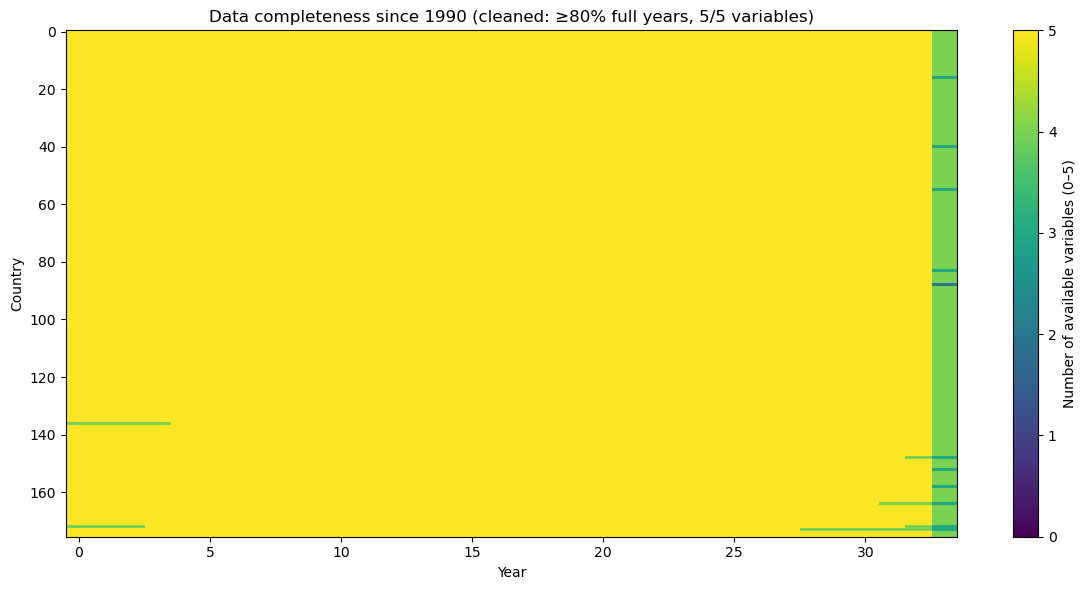

In [119]:
import matplotlib.pyplot as plt

# --- pivot cleaned data ---
pivot = df_clean.pivot_table(
    index=country_col,
    columns="Year",
    values="completeness",
    aggfunc="mean"
).sort_index(axis=1)

Z = pivot.values  # 0..5

# --- yellow-style heatmap ---
plt.figure(figsize=(12, 6))
im = plt.imshow(
    Z,
    aspect="auto",
    interpolation="nearest",
    vmin=0,
    vmax=5
)

cbar = plt.colorbar(im)
cbar.set_label("Number of available variables (0–5)")
cbar.set_ticks(range(0, 6))

plt.xlabel("Year")
plt.ylabel("Country")
plt.title("Data completeness since 1990 (cleaned: ≥80% full years, 5/5 variables)")
plt.tight_layout()
plt.show()


Current missing data ratio is sufficient to start inputation. Let's analyzes the missing data first

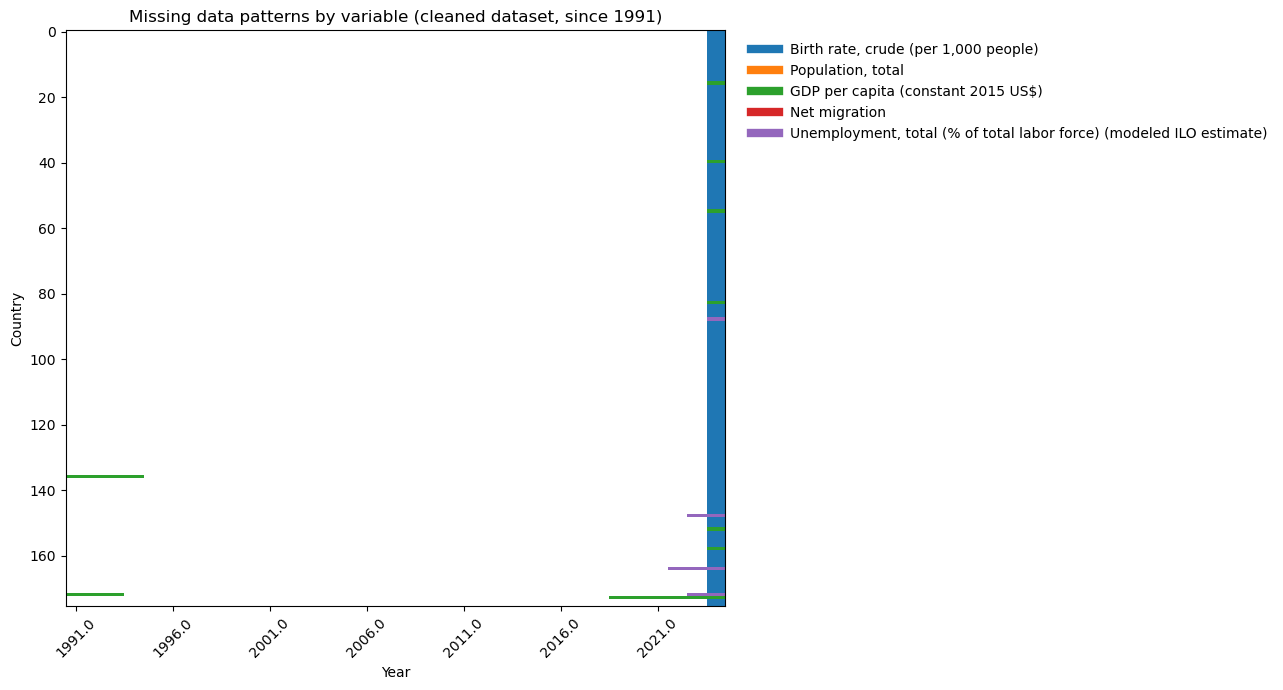

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

START_YEAR = 1991

# --- select 5 variables (exclude precipitation) ---
vars5 = [v for v in variables if "precip" not in v.lower()]

# --- USE CLEANED DATASET ---
df_plot = df_clean[df_clean["Year"] >= START_YEAR][[country_col, "Year"] + vars5].copy()

countries = np.sort(df_plot[country_col].unique())
years = np.sort(df_plot["Year"].unique())

# --- build a binary missingness matrix per variable: (country x year) ---
masks = []
for var in vars5:
    m = (
        df_plot.assign(_miss=df_plot[var].isna().astype(int))
        .pivot_table(index=country_col, columns="Year", values="_miss", aggfunc="max")
        .reindex(index=countries, columns=years, fill_value=0)
        .values
        .astype(bool)
    )
    masks.append(m)

# --- compose an RGB image: white background + one color per missing variable ---
base = np.ones((len(countries), len(years), 3), dtype=float)  # white
colors = np.array(plt.cm.tab10.colors[:len(vars5)])          # 5 distinct colors

# overwrite rule (crisp stripes): if multiple vars missing same cell, later var wins
rgb = base.copy()
for j, mask in enumerate(masks):
    rgb[mask] = colors[j]

plt.figure(figsize=(13, 7))
plt.imshow(rgb, aspect="auto", interpolation="nearest")

plt.xlabel("Year")
plt.ylabel("Country")
plt.title("Missing data patterns by variable (cleaned dataset, since 1991)")

# x ticks: show every 5th year
xt = np.arange(len(years))[::5]
plt.xticks(xt, years[::5], rotation=45)

# legend
handles = [plt.Line2D([0], [0], color=colors[j], lw=6) for j in range(len(vars5))]
plt.legend(handles, vars5, loc="upper left", bbox_to_anchor=(1.02, 1.0), frameon=False)

plt.tight_layout()
plt.show()


Here the missing data is plotting per variable. Unenployement, and GDP per capita is missing and in the last part Birth rate. Let's list the countries those have missing data. 

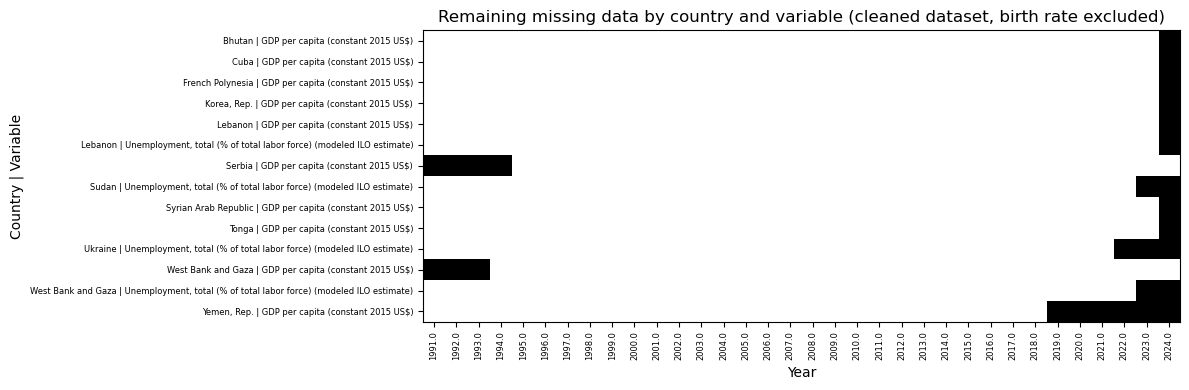

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# --- settings ---
START_YEAR = 1991

# --- variables EXCLUDING birth rate ---
vars_no_birth = [v for v in vars5 if "birth rate" not in v.lower()]

# --- restrict cleaned dataset ---
df_miss = df_clean[df_clean["Year"] >= START_YEAR][[country_col, "Year"] + vars_no_birth].copy()

# --- build (country, variable) × year missingness matrix ---
rows = []
row_labels = []

years = sorted(df_miss["Year"].unique())

for country in df_miss[country_col].unique():
    df_c = df_miss[df_miss[country_col] == country]
    for var in vars_no_birth:
        missing_mask = df_c.set_index("Year")[var].isna()
        if missing_mask.any():  # only keep rows with at least one missing
            rows.append(missing_mask.reindex(years, fill_value=False).values.astype(int))
            row_labels.append(f"{country} | {var}")

Z = np.array(rows)

# --- plot ---
plt.figure(figsize=(12, max(4, len(row_labels) * 0.12)))
plt.imshow(
    Z,
    aspect="auto",
    interpolation="nearest",
    cmap="gray_r"  # white = present, black = missing
)

plt.xlabel("Year")
plt.ylabel("Country | Variable")
plt.yticks(range(len(row_labels)), row_labels, fontsize=6)
plt.xticks(
    range(len(years)),
    years,
    rotation=90,
    fontsize=6
)

plt.title("Remaining missing data by country and variable (cleaned dataset, birth rate excluded)")
plt.tight_layout()
plt.show()


Data is missing for countries that are quite unique, most of them have/had local conflicts. The data is missing in all cases in the beginning of the period and/or at the end of the period. Two variables have missing values: GDP per capita and Unemployment. We should use for GDP fitting trend and extrapolation forward and backward based on the missing data. For Unenpolyment rolling mean looks better for inputation. 

In [ ]:
import numpy as np
import pandas as pd

# -------------------------
# PARAMETERS
# -------------------------
START_YEAR = 1991
MAX_GAP = 5

GDP_VAR = [v for v in vars5 if "gdp" in v.lower()][0]
UNEMP_VAR = [v for v in vars5 if "unemployment" in v.lower()][0]

df_imp = df_clean[df_clean["Year"] >= START_YEAR].copy()

# -------------------------
# GDP IMPUTATION
# -------------------------
def impute_gdp_trend(df_country):
    y = df_country["Year"].values
    gdp = df_country[GDP_VAR].values

    mask = ~np.isnan(gdp)
    if mask.sum() < 3:
        return df_country

    coef = np.polyfit(y[mask], np.log(gdp[mask]), 1)
    gdp_trend = np.exp(coef[0] * y + coef[1])

    first, last = np.where(mask)[0][[0, -1]]
    if first <= MAX_GAP:
        gdp[:first] = gdp_trend[:first]
    if len(gdp) - last - 1 <= MAX_GAP:
        gdp[last + 1 :] = gdp_trend[last + 1 :]

    df_country[GDP_VAR] = gdp
    return df_country


# -------------------------
# UNEMPLOYMENT IMPUTATION
# -------------------------
def impute_unemp_rolling(df_country, window=5):
    u = df_country[UNEMP_VAR]

    if u.notna().sum() < 3:
        return df_country

    roll = u.rolling(window=window, center=True, min_periods=1).mean()

    first_valid = u.first_valid_index()
    last_valid = u.last_valid_index()

    if first_valid is not None:
        n_start = df_country.index.get_loc(first_valid)
        if n_start <= MAX_GAP:
            u.iloc[:n_start] = roll.iloc[:n_start]

    if last_valid is not None:
        n_end = len(u) - df_country.index.get_loc(last_valid) - 1
        if n_end <= MAX_GAP:
            u.iloc[df_country.index.get_loc(last_valid) + 1 :] = roll.iloc[
                df_country.index.get_loc(last_valid) + 1 :
            ]

    df_country[UNEMP_VAR] = u
    return df_country


# -------------------------
# APPLY IMPUTATION (FIXED)
# -------------------------
df_imp = (
    df_imp.sort_values([country_col, "Year"])
    .groupby(country_col, group_keys=False)
    .apply(impute_gdp_trend)
    .groupby(country_col, group_keys=False)
    .apply(impute_unemp_rolling)
)

print("Trend-based imputation completed.")
print("Imputed dataset saved in memory as: df_imp")


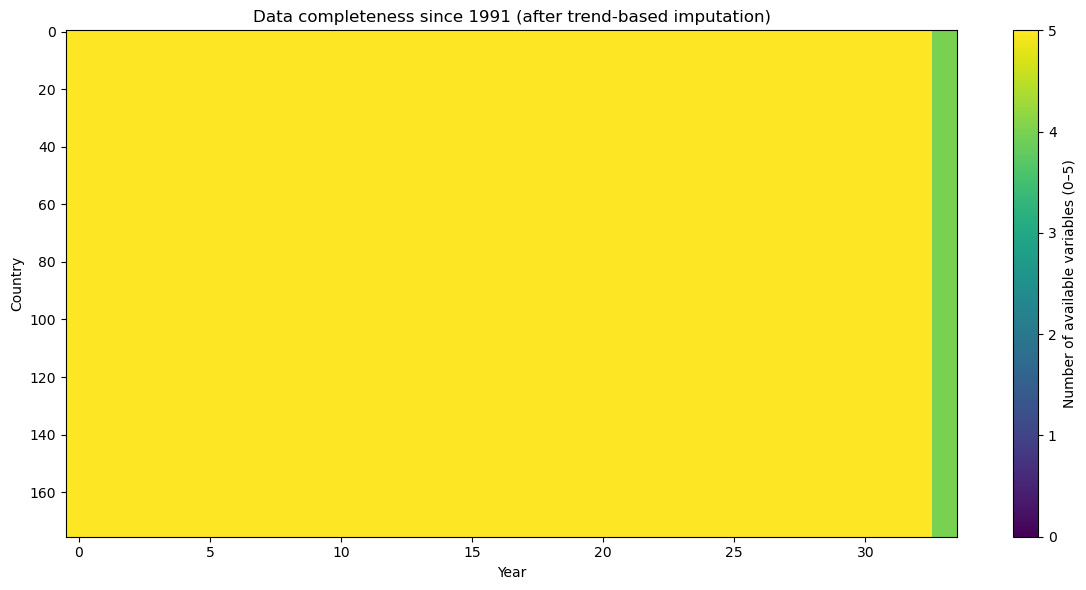

In [122]:
import matplotlib.pyplot as plt

# --- recompute completeness AFTER imputation ---
df_imp["completeness"] = df_imp[vars5].notna().sum(axis=1)

# --- pivot imputed data ---
pivot = df_imp.pivot_table(
    index=country_col,
    columns="Year",
    values="completeness",
    aggfunc="mean"
).sort_index(axis=1)

Z = pivot.values  # 0..5

# --- yellow-style heatmap ---
plt.figure(figsize=(12, 6))
im = plt.imshow(
    Z,
    aspect="auto",
    interpolation="nearest",
    vmin=0,
    vmax=5
)

cbar = plt.colorbar(im)
cbar.set_label("Number of available variables (0–5)")
cbar.set_ticks(range(0, 6))

plt.xlabel("Year")
plt.ylabel("Country")
plt.title("Data completeness since 1991 (after trend-based imputation)")
plt.tight_layout()
plt.show()


Inputation done, but one country was left out because the missing data length (number of years) higher the the defined. 

In [123]:
# Exclude birth rate from the missingness check
vars4 = [v for v in vars5 if "birth rate" not in v.lower()]

rem = df_imp[df_imp[vars4].isna().any(axis=1)]

summary = (
    rem
    .groupby(country_col)[vars4]
    .apply(lambda x: x.isna().sum())
)

summary = summary[summary.sum(axis=1) > 0]

print("Countries with remaining missing data after imputation (birth rate excluded):\n")
for country, row in summary.iterrows():
    missing_vars = row[row > 0]
    print(f"{country}:")
    for var, n in missing_vars.items():
        print(f"  - {var}: missing {int(n)} year(s)")


Countries with remaining missing data after imputation (birth rate excluded):



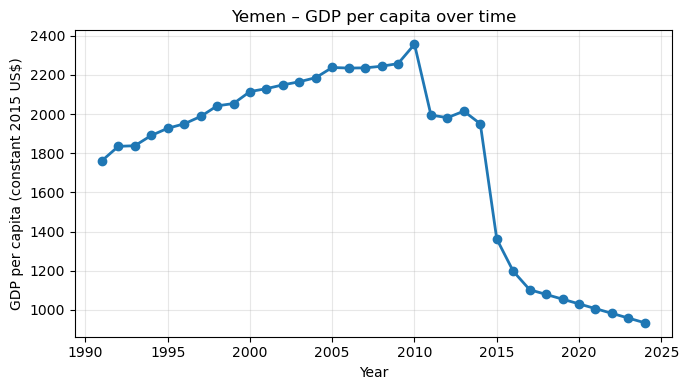

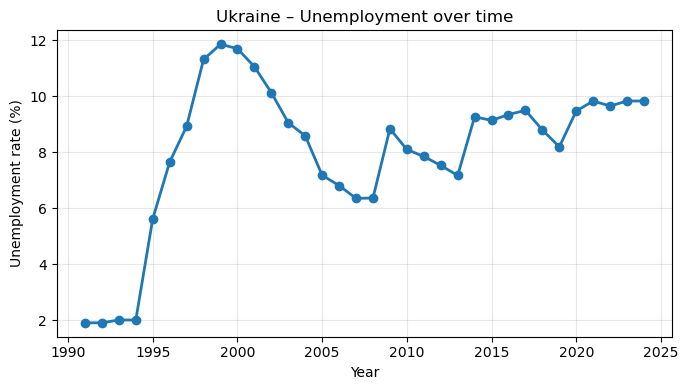

In [124]:
import matplotlib.pyplot as plt

# --- variable names ---
GDP_VAR = "GDP per capita (constant 2015 US$)"
UNEMP_VAR = "Unemployment, total (% of total labor force) (modeled ILO estimate)"

# =========================
# YEMEN – GDP per capita
# =========================
df_yemen = df_imp[df_imp[country_col] == "Yemen, Rep."].sort_values("Year")

plt.figure(figsize=(7, 4))
plt.plot(
    df_yemen["Year"],
    df_yemen[GDP_VAR],
    marker="o",
    linewidth=2
)
plt.xlabel("Year")
plt.ylabel("GDP per capita (constant 2015 US$)")
plt.title("Yemen – GDP per capita over time")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# =========================
# UKRAINE – Unemployment
# =========================
df_ukraine = df_imp[df_imp[country_col] == "Ukraine"].sort_values("Year")

plt.figure(figsize=(7, 4))
plt.plot(
    df_ukraine["Year"],
    df_ukraine[UNEMP_VAR],
    marker="o",
    linewidth=2
)
plt.xlabel("Year")
plt.ylabel("Unemployment rate (%)")
plt.title("Ukraine – Unemployment over time")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Ukrain's unenployement rate probably remained or a bit reduced because of the ongoing conflict. Yemen's GDP did not increased in the last 10 years based on news, probebly declined. Based on this we can inputate last data for Ukraine, and based on reducing trend form last 2 datapoints we can inputate GDP for Yemen.

In [125]:
import numpy as np

GDP_VAR = "GDP per capita (constant 2015 US$)"
UNEMP_VAR = "Unemployment, total (% of total labor force) (modeled ILO estimate)"

# =========================
# UKRAINE – unemployment: carry last value forward
# =========================
mask_ua = (df_imp[country_col] == "Ukraine")

df_imp.loc[mask_ua, UNEMP_VAR] = (
    df_imp.loc[mask_ua]
    .sort_values("Year")[UNEMP_VAR]
    .ffill()
)

# =========================
# YEMEN – GDP: linear trend from last 2 observed values, forward extrapolation
# =========================
mask_ye = (df_imp[country_col] == "Yemen, Rep.")
df_yemen = df_imp.loc[mask_ye].sort_values("Year")

# observed (non-missing) part
obs = df_yemen[df_yemen[GDP_VAR].notna()]

# last two observed points
y1, y2 = obs.iloc[-2:][GDP_VAR].values
t1, t2 = obs.iloc[-2:]["Year"].values

slope = (y2 - y1) / (t2 - t1)

# apply extrapolation
for idx, row in df_yemen[df_yemen[GDP_VAR].isna()].iterrows():
    year = row["Year"]
    df_imp.loc[idx, GDP_VAR] = y2 + slope * (year - t2)

print("Imputation applied:")
print("- Ukraine: unemployment forward-filled (last observation carried forward)")
print("- Yemen: GDP per capita linearly extrapolated from last 2 observed years")


Imputation applied:
- Ukraine: unemployment forward-filled (last observation carried forward)
- Yemen: GDP per capita linearly extrapolated from last 2 observed years


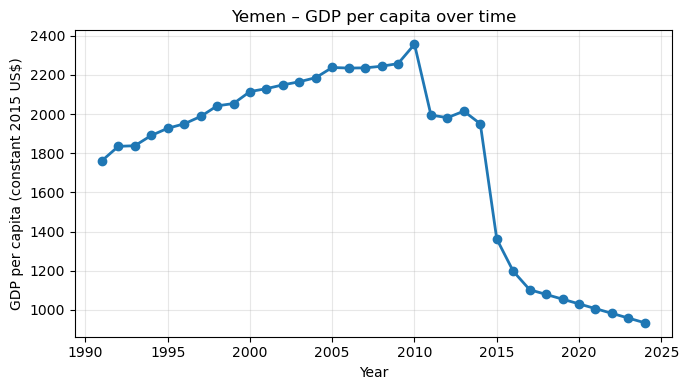

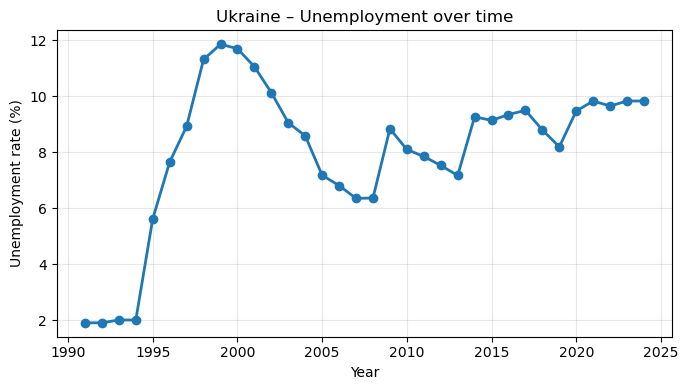

In [126]:
import matplotlib.pyplot as plt

# --- variable names ---
GDP_VAR = "GDP per capita (constant 2015 US$)"
UNEMP_VAR = "Unemployment, total (% of total labor force) (modeled ILO estimate)"

# =========================
# YEMEN – GDP per capita
# =========================
df_yemen = df_imp[df_imp[country_col] == "Yemen, Rep."].sort_values("Year")

plt.figure(figsize=(7, 4))
plt.plot(
    df_yemen["Year"],
    df_yemen[GDP_VAR],
    marker="o",
    linewidth=2
)
plt.xlabel("Year")
plt.ylabel("GDP per capita (constant 2015 US$)")
plt.title("Yemen – GDP per capita over time")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# =========================
# UKRAINE – Unemployment
# =========================
df_ukraine = df_imp[df_imp[country_col] == "Ukraine"].sort_values("Year")

plt.figure(figsize=(7, 4))
plt.plot(
    df_ukraine["Year"],
    df_ukraine[UNEMP_VAR],
    marker="o",
    linewidth=2
)
plt.xlabel("Year")
plt.ylabel("Unemployment rate (%)")
plt.title("Ukraine – Unemployment over time")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


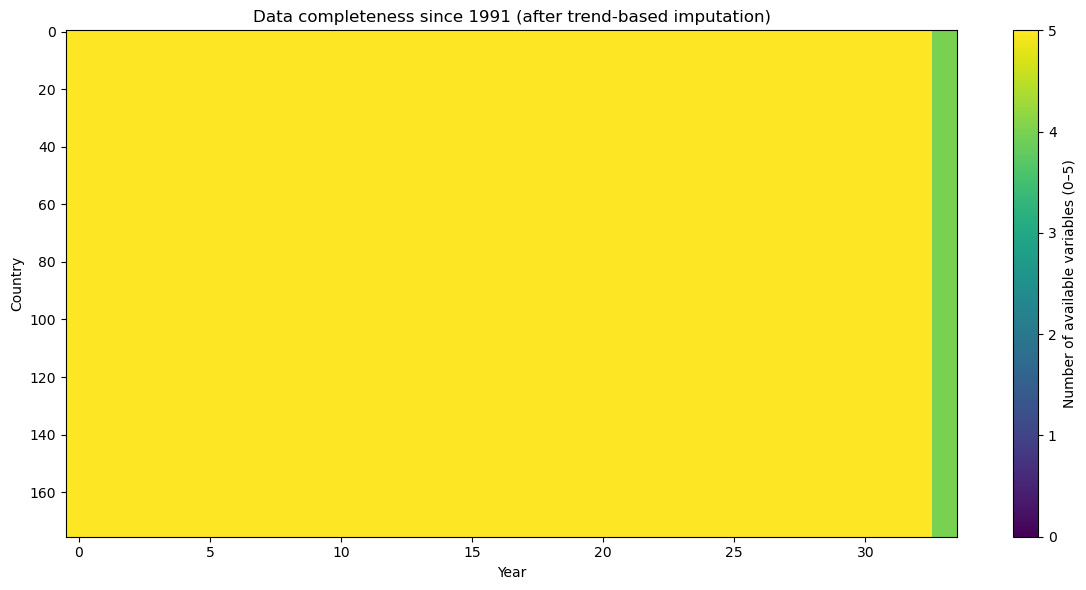

In [127]:
import matplotlib.pyplot as plt

# --- recompute completeness AFTER imputation ---
df_imp["completeness"] = df_imp[vars5].notna().sum(axis=1)

# --- pivot imputed data ---
pivot = df_imp.pivot_table(
    index=country_col,
    columns="Year",
    values="completeness",
    aggfunc="mean"
).sort_index(axis=1)

Z = pivot.values  # 0..5

# --- yellow-style heatmap ---
plt.figure(figsize=(12, 6))
im = plt.imshow(
    Z,
    aspect="auto",
    interpolation="nearest",
    vmin=0,
    vmax=5
)

cbar = plt.colorbar(im)
cbar.set_label("Number of available variables (0–5)")
cbar.set_ticks(range(0, 6))

plt.xlabel("Year")
plt.ylabel("Country")
plt.title("Data completeness since 1991 (after trend-based imputation)")
plt.tight_layout()
plt.show()


Data is ready for claster analyzes. Let's use the technique we used for missing data clastering.

Found some NaN values. Checking data structure.

In [135]:
# Count NaN values per variable (no aggregation, raw df_imp)
nan_counts = df_imp[vars5].isna().sum()

print("NaN counts per variable:")
for var, cnt in nan_counts.items():
    print(f"{var}: {cnt}")


NaN counts per variable:
Birth rate, crude (per 1,000 people): 176
Population, total: 0
GDP per capita (constant 2015 US$): 0
Net migration: 0
Unemployment, total (% of total labor force) (modeled ILO estimate): 0


NaN-s are present in birth rate variable last year. Need additional inputation. 

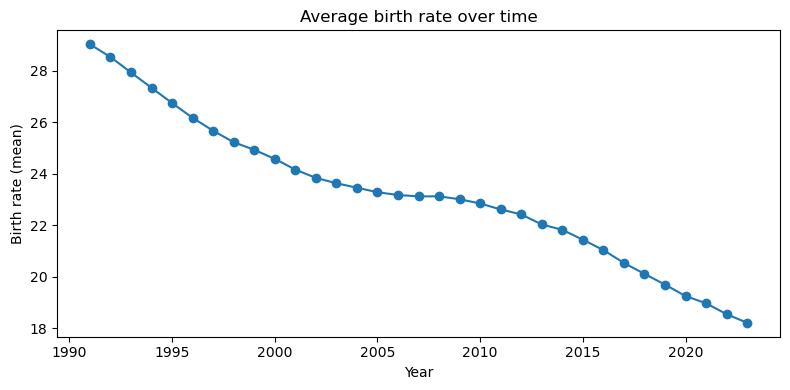

In [136]:
import matplotlib.pyplot as plt

# --- Birth rate time series (mean across countries, NaN ignored by default) ---
birth_rate_col = "Birth rate, crude (per 1,000 people)"

ts = (
    df_imp
    .groupby("Year")[birth_rate_col]
    .mean()
)

plt.figure(figsize=(8, 4))
plt.plot(ts.index, ts.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Birth rate (mean)")
plt.title("Average birth rate over time")
plt.tight_layout()
plt.show()


In [137]:
# Max reported year per variable (NaN ignored)
for v in vars5:
    max_year = df_imp.loc[df_imp[v].notna(), "Year"].max()
    print(f"{v}: max year = {int(max_year)}")


Birth rate, crude (per 1,000 people): max year = 2023
Population, total: max year = 2024
GDP per capita (constant 2015 US$): max year = 2024
Net migration: max year = 2024
Unemployment, total (% of total labor force) (modeled ILO estimate): max year = 2024


Need inputation for 2024 for all country for Birth rate variable. As the avarage Birth rate is showing a strong declinging trend, the inputation also should follow trend - but individually for each country.

In [139]:
import numpy as np

# --- parameters ---
WINDOW = 5
vars_to_impute = vars5  # all 5 variables

df_imp = df_imp.sort_values([country_col, "Year"]).copy()

def impute_trend_last5(group):
    years = group["Year"].values

    for var in vars_to_impute:
        y = group[var].values.astype(float)

        for i in range(len(y)):
            if np.isnan(y[i]):
                # look back up to last 5 valid points
                idx = np.where(~np.isnan(y[:i]))[0]
                idx = idx[-WINDOW:]

                if len(idx) >= 2:
                    x_fit = years[idx]
                    y_fit = y[idx]

                    # linear trend fit
                    coef = np.polyfit(x_fit, y_fit, 1)
                    y[i] = coef[0] * years[i] + coef[1]

        group[var] = y

    return group

# --- apply country-wise ---
df_imp = (
    df_imp
    .groupby(country_col, group_keys=False)
    .apply(impute_trend_last5)
)

print("Trend-based imputation applied using last 5 years (country-wise).")


Trend-based imputation applied using last 5 years (country-wise).


C:\Users\andrh\AppData\Local\Temp\ipykernel_6044\1799357892.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(impute_trend_last5)


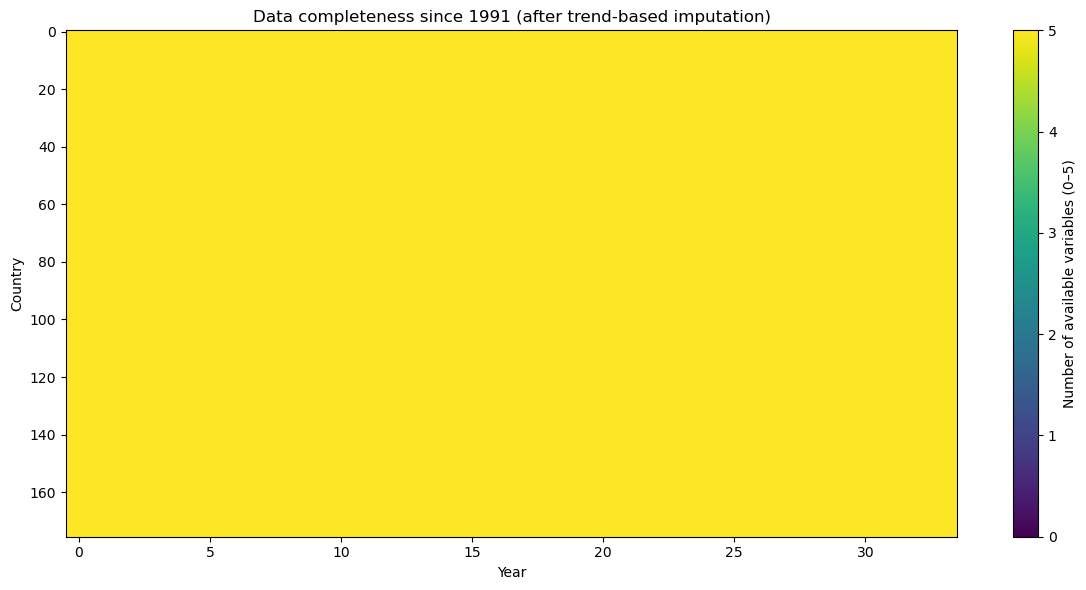

In [140]:
import matplotlib.pyplot as plt

# --- recompute completeness AFTER imputation ---
df_imp["completeness"] = df_imp[vars5].notna().sum(axis=1)

# --- pivot imputed data ---
pivot = df_imp.pivot_table(
    index=country_col,
    columns="Year",
    values="completeness",
    aggfunc="mean"
).sort_index(axis=1)

Z = pivot.values  # 0..5

# --- yellow-style heatmap ---
plt.figure(figsize=(12, 6))
im = plt.imshow(
    Z,
    aspect="auto",
    interpolation="nearest",
    vmin=0,
    vmax=5
)

cbar = plt.colorbar(im)
cbar.set_label("Number of available variables (0–5)")
cbar.set_ticks(range(0, 6))

plt.xlabel("Year")
plt.ylabel("Country")
plt.title("Data completeness since 1991 (after trend-based imputation)")
plt.tight_layout()
plt.show()


K=2: inertia=12742175382571018240.00, silhouette=0.970
K=3: inertia=4899006636962000896.00, silhouette=0.843
K=4: inertia=3095707749238837248.00, silhouette=0.767
K=5: inertia=2036446221022425856.00, silhouette=0.764
K=6: inertia=1284725812815840256.00, silhouette=0.746
K=7: inertia=999484208956132864.00, silhouette=0.698
K=8: inertia=740133652150647040.00, silhouette=0.700
K=9: inertia=562261907157582976.00, silhouette=0.692
K=10: inertia=452648756580388544.00, silhouette=0.657


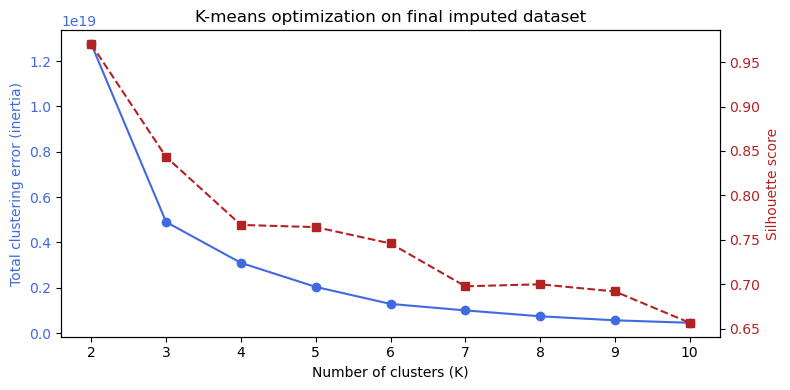

In [141]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# --- use only variables that actually exist in df_imp (exclude precipitation) ---
vars_clust = [v for v in variables if v in df_imp.columns]

X = df_imp[vars_clust].values

Ks = range(2, 11)
inertias = []
separations = []

for k in Ks:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=20,
        max_iter=300,
        random_state=42,
        tol=1e-4
    )
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    separations.append(silhouette_score(X, labels))
    print(f"K={k}: inertia={kmeans.inertia_:.2f}, silhouette={separations[-1]:.3f}")

# --- plot ---
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(Ks, inertias, "o-", color="royalblue")
ax1.set_xlabel("Number of clusters (K)")
ax1.set_ylabel("Total clustering error (inertia)", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")
ax1.set_title("K-means optimization on final imputed dataset")

ax2 = ax1.twinx()
ax2.plot(Ks, separations, "s--", color="firebrick")
ax2.set_ylabel("Silhouette score", color="firebrick")
ax2.tick_params(axis="y", labelcolor="firebrick")

fig.tight_layout()
plt.show()


Let's try with K=5 for K-means clsutering to get 5 clusters of countries based on 5 variables between 1991 and 2024.

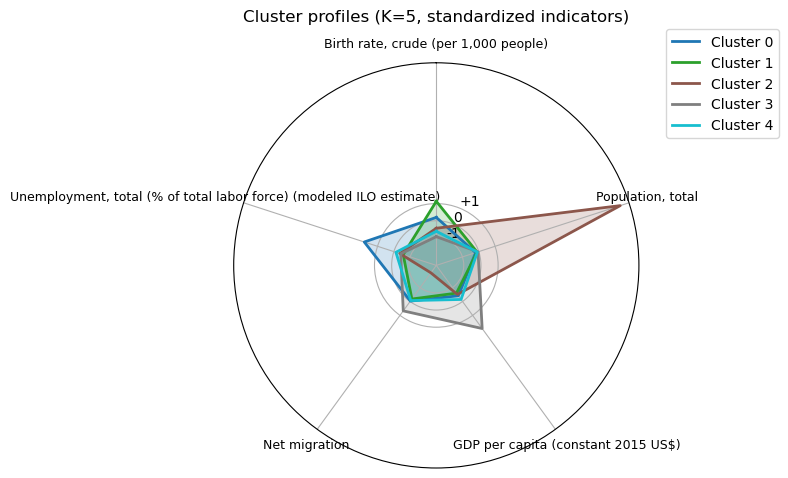

In [144]:
# ================================
# K=5 CLUSTERING + RADAR PLOT
# ================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- variables used ---
vars5 = [
    'Birth rate, crude (per 1,000 people)',
    'Population, total',
    'GDP per capita (constant 2015 US$)',
    'Net migration',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
]

# --- select data for clustering ---
X = df_imp[vars5].values

# --- standardize (IMPORTANT for radar + KMeans) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- KMeans with K=5 ---
kmeans_5 = KMeans(
    n_clusters=5,
    init="k-means++",
    n_init=20,
    max_iter=300,
    random_state=42
)

labels_5 = kmeans_5.fit_predict(X_scaled)

# --- attach cluster labels ---
df_radar = df_imp.copy()
df_radar["cluster"] = labels_5

# --- cluster means in SCALED space ---
cluster_means = (
    pd.DataFrame(X_scaled, columns=vars5)
    .assign(cluster=labels_5)
    .groupby("cluster")
    .mean()
)

# ================================
# RADAR PLOT
# ================================

labels = vars5
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = plt.cm.tab10(np.linspace(0, 1, 5))

for c, color in zip(cluster_means.index, colors):
    values = cluster_means.loc[c].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=f"Cluster {c}", color=color)
    ax.fill(angles, values, alpha=0.2, color=color)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)

ax.set_yticks([-1, 0, 1])
ax.set_yticklabels(["-1", "0", "+1"])

ax.set_title("Cluster profiles (K=5, standardized indicators)", pad=30)
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1.1))

plt.tight_layout()
plt.show()


Data is inputed. Problem with the data is that it contains absolute numbers and we are looking for trends - where magnitued is not relevant. We need to create rates.

In [145]:
# --- K-means clustering on FINAL IMPUTED + STANDARDIZED DATA ---
from sklearn.cluster import KMeans
import numpy as np

# variables actually used
vars5 = [
    'Birth rate, crude (per 1,000 people)',
    'Population, total',
    'GDP per capita (constant 2015 US$)',
    'Net migration',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
]

# input matrix (NO NaN here by assumption)
X = df_imp[vars5].values

K = 5
kmeans = KMeans(
    n_clusters=K,
    init="k-means++",
    n_init=20,
    max_iter=300,
    random_state=42,
    tol=1e-4
)

df_imp["Cluster"] = kmeans.fit_predict(X)

print(f"Total clusters (K): {K}")

# --- cluster statistics ---
cluster_means = df_imp.groupby("Cluster")[vars5].mean()
cluster_sizes = df_imp["Cluster"].value_counts().sort_index()

country_col = "Country Name"

print("\n=== Cluster Overview ===")
for c in sorted(cluster_means.index):
    size = cluster_sizes[c]
    means = cluster_means.loc[c]

    print(f"\nCluster {c}")
    print(f"  Number of rows: {size}")
    print("  Mean values:")
    print(means.round(2).to_string())

    examples = (
        df_imp[df_imp["Cluster"] == c][country_col]
        .drop_duplicates()
        .head(5)
        .to_list()
    )
    print(f"  Example countries: {', '.join(examples)}")


Total clusters (K): 5

=== Cluster Overview ===

Cluster 0
  Number of rows: 4927
  Mean values:
Birth rate, crude (per 1,000 people)                                        23.69
Population, total                                                      8921727.19
GDP per capita (constant 2015 US$)                                       12371.09
Net migration                                                              442.63
Unemployment, total (% of total labor force) (modeled ILO estimate)          8.16
  Example countries: Albania, Algeria, Angola, Argentina, Armenia

Cluster 1
  Number of rows: 21
  Mean values:
Birth rate, crude (per 1,000 people)                                   2.594000e+01
Population, total                                                      1.063650e+09
GDP per capita (constant 2015 US$)                                     8.320800e+02
Net migration                                                         -3.108856e+05
Unemployment, total (% of total labor force)

**Data is inputed. Problem with the data is that it contains absolute numbers and we are looking for trends - where magnitued is not relevant. Clusters are not ideals, contain minimal meaning. We need to create trends per country - and drop volume data. Also need to drop years and replace it with a trend descriptive vector per country. We will use these "normalized" vectors to create clusters from countries.**

First step, create t1/t0 type of data from the original data. 

In [148]:
# variables to transform
vars5 = [
    'Birth rate, crude (per 1,000 people)',
    'Population, total',
    'GDP per capita (constant 2015 US$)',
    'Net migration',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
]

# sort properly
df_ratio = df_imp.sort_values([country_col, "Year"]).copy()

# compute t1 / t0 ratios country-wise (SAFE)
for var in vars5:
    df_ratio[var + "_ratio"] = (
        df_ratio
        .groupby(country_col)[var]
        .transform(lambda x: x / x.shift(1))
    )

print("Time-relative ratios (t1 / t0) computed successfully.")


Time-relative ratios (t1 / t0) computed successfully.


In [149]:
cols_to_show = (
    [country_col, "Year"] +
    [v for v in vars5] +
    [v + "_ratio" for v in vars5]
)

print(df_ratio[cols_to_show].head(10))


    Country Name    Year  Birth rate, crude (per 1,000 people)  \
96       Albania  1991.0                                25.618   
97       Albania  1992.0                                24.990   
98       Albania  1993.0                                24.194   
99       Albania  1994.0                                23.850   
100      Albania  1995.0                                23.263   
101      Albania  1996.0                                22.145   
102      Albania  1997.0                                20.762   
103      Albania  1998.0                                19.609   
104      Albania  1999.0                                18.487   
105      Albania  2000.0                                17.513   

     Population, total  GDP per capita (constant 2015 US$)  Net migration  \
96           3266790.0                         1218.964273       -63689.0   
97           3247039.0                         1138.237740       -66538.0   
98           3227287.0                    

Checking for NaN values.

Ratio vars: ['completeness_ratio']


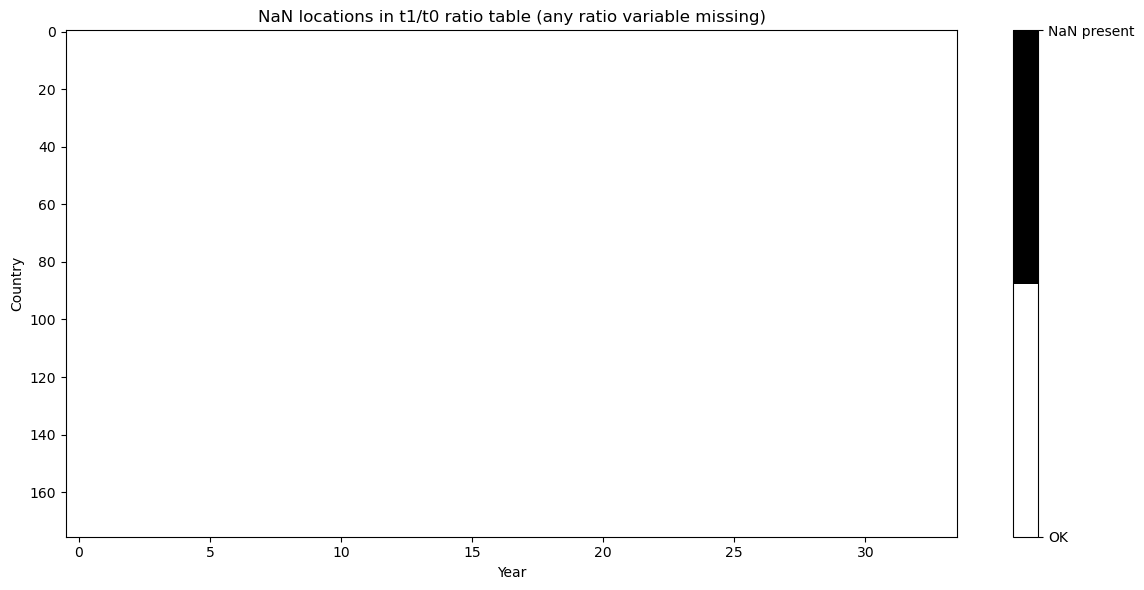

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# --- ratio változók (t1/t0) ---
ratio_vars = [c for c in df_imp.columns if c.endswith("_ratio")]
print("Ratio vars:", ratio_vars)

# --- NaN mask: 1 = van legalább egy NaN az adott (country, year) sorban ---
nan_any = df_imp[ratio_vars].isna().any(axis=1).astype(int)

# --- pivot (pixelenként: ország × év) ---
pivot_nan = df_imp.assign(nan_any=nan_any).pivot_table(
    index=country_col,
    columns="Year",
    values="nan_any",
    aggfunc="max"   # ha duplikált sor van, akkor is jelezze a NaN-t
).sort_index(axis=1)

Z = pivot_nan.values  # 0/1

plt.figure(figsize=(12, 6))
cmap = ListedColormap(["white", "black"])  # 0=ok, 1=NaN
im = plt.imshow(Z, aspect="auto", interpolation="nearest", vmin=0, vmax=1, cmap=cmap)

cbar = plt.colorbar(im, ticks=[0, 1])
cbar.ax.set_yticklabels(["OK", "NaN present"])

plt.xlabel("Year")
plt.ylabel("Country")
plt.title("NaN locations in t1/t0 ratio table (any ratio variable missing)")
plt.tight_layout()
plt.show()


In [153]:
# --- export final ratio-based dataset ---
df_imp.to_csv("final_ratio_dataset.csv", index=False)
